___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_row', 200)
plt.rcParams["figure.figsize"] = (8,5)

import plotly.express as px
from ipywidgets import interact

# column transform and encoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import average_precision_score, roc_auc_score

# SVC Library
from sklearn.svm import SVC
from sklearn.metrics import make_scorer


# RF library
from sklearn.ensemble import RandomForestClassifier


# # yellowbrick library for visualizing the model performance
# from yellowbrick.classifier import ConfusionMatrix
# from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_f = pd.read_csv("ANSUR II FEMALE Public.csv")
df_m = pd.read_csv("ANSUR II MALE Public.csv",encoding = "ISO-8859-1")

In [3]:
df_f.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectId,1986.0,22306.606244,20904.730297,10037.0,17667.00,22096.5,26089.75,920103.0
abdominalextensiondepthsitting,1986.0,229.651057,31.464691,155.0,207.00,227.0,249.00,358.0
acromialheight,1986.0,1335.095166,58.079885,1115.0,1298.00,1332.0,1374.00,1536.0
acromionradialelength,1986.0,311.198389,17.164691,249.0,300.00,311.0,323.00,371.0
anklecircumference,1986.0,215.739678,14.891757,170.0,205.00,215.0,225.00,275.0
axillaheight,1986.0,1239.029708,55.801958,1038.0,1202.00,1236.0,1277.00,1419.0
balloffootcircumference,1986.0,228.110272,11.771007,194.0,220.00,227.0,236.00,270.0
balloffootlength,1986.0,182.051360,9.641920,151.0,175.00,182.0,188.00,216.0
biacromialbreadth,1986.0,365.348943,18.298851,283.0,353.00,365.0,378.00,422.0
bicepscircumferenceflexed,1986.0,305.578550,30.757033,216.0,285.00,304.0,324.00,435.0


In [4]:
df_m.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,4082.0,254.650906,37.327178,163.0,227.00,251.0,279.00,451.0
acromialheight,4082.0,1440.736894,63.287242,1194.0,1398.00,1439.0,1481.00,1683.0
acromionradialelength,4082.0,335.244488,17.482795,270.0,324.00,335.0,346.00,393.0
anklecircumference,4082.0,229.343949,14.649102,156.0,219.25,228.0,239.00,293.0
axillaheight,4082.0,1329.082068,59.516123,1106.0,1289.00,1328.0,1367.00,1553.0
balloffootcircumference,4082.0,252.017148,12.936131,186.0,243.00,252.0,261.00,306.0
balloffootlength,4082.0,200.935081,10.470947,156.0,194.00,201.0,208.00,245.0
biacromialbreadth,4082.0,415.675649,19.161654,337.0,403.00,415.0,428.00,489.0
bicepscircumferenceflexed,4082.0,358.135718,34.618093,246.0,335.00,357.0,380.00,490.0


In [5]:
df_f.shape

(1986, 108)

In [6]:
df_m.shape

(4082, 108)

In [7]:
null_columns = {}
for column in df_f.columns:
    if df_f[column].isna().sum() > 0 :
        null_columns[column] = df_f[column].isna().sum()
null_columns

{'Ethnicity': 1467}

In [8]:
null_columns = {}
for column in df_m.columns:
    if df_m[column].isna().sum() > 0 :
        null_columns[column] = df_m[column].isna().sum()
null_columns

{'Ethnicity': 3180}

In [9]:
# All columns are same
df_f.columns.str.lower() == df_m.columns.str.lower()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [10]:
# First column is different
df_f.columns== df_m.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
df_f.columns[0]

'SubjectId'

In [12]:
df_f.rename(columns = {'SubjectId':'subjectid'}, inplace = True)

In [13]:
df0 = pd.concat([df_f,df_m], axis=0, ignore_index=True)
df = df0.copy()
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [14]:
df.shape

(6068, 108)

In [15]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [16]:
null_columns = {}
for column in df.columns:
    if df[column].isna().sum() > 0 :
        null_columns[column] = df[column].isna().sum()
null_columns

{'Ethnicity': 4647}

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.0,20757.198418,13159.390894,10027.0,14841.75,20063.5,27234.50,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [18]:
df.describe(include="object").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [19]:
df.select_dtypes(include="object")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,NaN,Right hand
1,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Mexican,Right hand
2,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,NaN,Right hand
3,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Caribbean Islander,Right hand
4,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,Blackfoot Cherokee Choctaw,Right hand
6064,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,NaN,Right hand
6065,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,NaN,Right hand
6066,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,NaN,Right hand


In [20]:
df.select_dtypes(exclude="object")

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,2,2,26,61,142
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,3,3,21,64,120
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,1,1,23,68,147
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,8,2,22,66,175
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,1,1,45,63,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [21]:
df.corr()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
subjectid,1.000000,-0.074702,-0.056287,-0.037505,-0.070446,-0.055057,-0.071510,0.001430,-0.082150,-0.070572,0.028671,-0.080712,-0.049426,-0.086444,-0.053103,-0.054291,-0.015120,-0.069990,-0.022891,-0.031233,0.042649,-0.049184,-0.065412,-0.019509,-0.069493,-0.032708,-0.040080,-0.022426,-0.044245,-0.188644,0.050830,-0.124125,-0.090568,-0.001614,-0.102278,-0.045490,-0.060872,-0.096064,-0.074443,-0.086128,-0.047800,-0.105716,-0.071225,-0.085648,-0.046868,-0.047340,-0.065551,-0.066234,-0.078628,-0.005070,-0.006978,-0.019887,-0.054759,-0.049501,-0.061439,-0.076019,-0.020008,-0.060229,0.022690,-0.108278,-0.024678,-0.038105,-0.082325,-0.091560,-0.181247,-0.051407,-0.008812,-0.049174,-0.091403,-0.065909,-0.103673,-0.075831,-0.047119,-0.023850,-0.095486,-0.064599,-0.072702,-0.002508,-0.030551,-0.105709,-0.102849,-0.072272,-0.005139,-0.046164,-0.082941,-0.039864,-0.062869,-0.065869,-0.047512,-0.149275,-0.044038,-0.066602,-0.101394,-0.037595,0.010501,0.021578,-0.046753,-0.054552,-0.070158
abdominalextensiondepthsitting,-0.074702,1.000000,0.360623,0.321755,0.524747,0.290821,0.459174,0.342050,0.421544,0.691460,0.506497,0.724471,0.371894,0.529000,0.621899,0.496898,0.741188,0.841581,0.258496,0.483275,0.333003,0.657287,0.346116,0.631068,0.826382,0.780450,0.304562,0.203336,0.466971,0.209593,0.247567,0.402031,0.132538,0.256314,0.282460,0.440374,0.354184,0.356183,0.629757,0.728564,0.317555,0.423842,0.426221,0.462871,0.311137,0.341047,0.370753,0.342171,0.509410,0.439029,0.597205,0.557642,0.268208,0.256375,0.603114,0.546482,0.288285,0.359487,0.235804,0.353888,0.673955,0.297767,0.658587,0.629364,0.329005,0.322198,0.163311,0.291144,0.639949,0.296521,0.192526,0.276912,0.429903,0.286739,0.327873,0.316876,0.361806,0.304103,0.732133,0.725401,0.396786,0.275044,0.183890,0.243939,0.729533,0.572025,0.859924,0.939899,0.958932,0.579296,0.162457,0.825714,0.550544,0.389220,0.021201,-0.079167,0.380614,0.300027,0.793634
acromialheight,-0.056287,0.360623,1.000000,0.872475,0.512417,0.987452,0.693403,0.802922,0.735565,0.529353,0.409043,0.633088,0.705621,0.569411,0.581562,0.478282,0.302339,0.355987,0.870776,0.817915,0.755708,0.413845,0.984230,0.549632,0.538292,0.293602,0.960106,0.901554,0.353748,0.421327,0.365927,0.434054,0.268885,0.282664,0.813120,0.667315,0.830812,0.849715,0.640346,0.578

In [22]:
def color_corr(val):
    if val == 1:
        color = "green"
    elif val > 0.9:
        color = 'red'
    elif val > 0.8:
        color = 'blue'    
    else:
        color = 'black'
    return 'color: %s' % color
df_corr = df.corr() 
df_corr.style.applymap(color_corr)

## Explore Numeric Data

In [23]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [24]:
df.select_dtypes(exclude="object")

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,2,2,26,61,142
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,3,3,21,64,120
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,1,1,23,68,147
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,8,2,22,66,175
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,1,1,45,63,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [25]:
# We don't need the "subjectid" column
df.drop("subjectid", axis=1, inplace=True)

In [26]:
corr_9 = {}
for column in df.select_dtypes(include="number").columns:
    for column2 in df.select_dtypes(include="number").drop(column, axis=1).columns[1:] :
        corr = round(df[column].corr(df[column2]), 2)
        if corr >= 0.9 :
            corr_9[column + " - " + column2] = corr

corr_9

{'abdominalextensiondepthsitting - waistcircumference': 0.94,
 'abdominalextensiondepthsitting - waistdepth': 0.96,
 'acromialheight - axillaheight': 0.99,
 'acromialheight - cervicaleheight': 0.98,
 'acromialheight - chestheight': 0.96,
 'acromialheight - crotchheight': 0.9,
 'acromialheight - functionalleglength': 0.9,
 'acromialheight - iliocristaleheight': 0.93,
 'acromialheight - kneeheightmidpatella': 0.9,
 'acromialheight - kneeheightsitting': 0.93,
 'acromialheight - poplitealheight': 0.9,
 'acromialheight - stature': 0.98,
 'acromialheight - suprasternaleheight': 0.99,
 'acromialheight - tenthribheight': 0.95,
 'acromialheight - waistheightomphalion': 0.93,
 'acromialheight - wristheight': 0.92,
 'acromialheight - Heightin': 0.94,
 'acromionradialelength - shoulderelbowlength': 0.97,
 'acromionradialelength - sleeveoutseam': 0.94,
 'acromionradialelength - span': 0.9,
 'axillaheight - acromialheight': 0.99,
 'axillaheight - cervicaleheight': 0.98,
 'axillaheight - chestheight'

**Height in Inches; self-reported, comparable to measured “stature”.**

**Weightlbs in Pounds; self-reported, comparable to measured “weightkg”.**

Let's first examine these 4 columns in connection with the correlations above.

### stature & Heightin

In [27]:
df[["stature", "Heightin"]]

,stature,Heightin
0,1560,61
1,1665,64
2,1711,68
3,1660,66
4,1572,63
...,...,...
6063,1688,67
6064,1765,71
6065,1690,67
6066,1718,69


In [28]:
# 1 inç equal to 25.4 mm
df.Heightin = df.Heightin.apply(lambda x : 25.4 * x)

In [29]:
df[["stature", "Heightin"]]

,stature,Heightin
0,1560,1549.4
1,1665,1625.6
2,1711,1727.2
3,1660,1676.4
4,1572,1600.2
...,...,...
6063,1688,1701.8
6064,1765,1803.4
6065,1690,1701.8
6066,1718,1752.6


           stature  Heightin
stature   1.000000  0.961355
Heightin  0.961355  1.000000


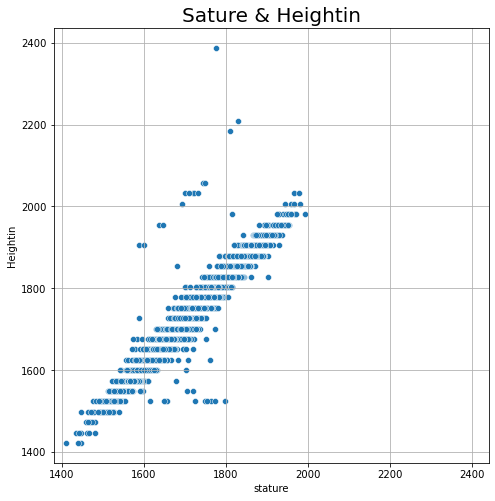

In [30]:
print(df[["stature", "Heightin"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "stature", y = "Heightin", data=df)
plt.axis('square')
plt.title("Sature & Heightin", size=20)
plt.grid();

                acromialheight  Heightin
acromialheight        1.000000  0.944577
Heightin              0.944577  1.000000


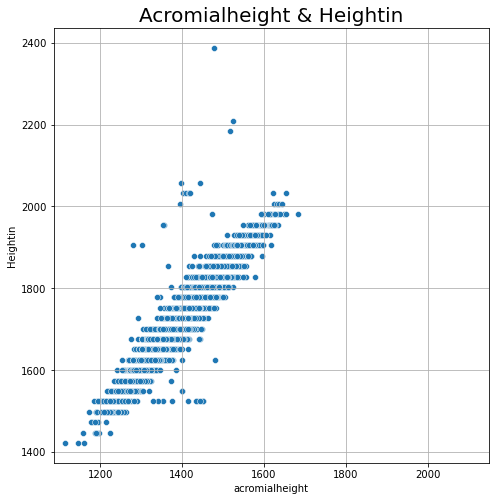

In [31]:
print(df[["acromialheight", "Heightin"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "acromialheight", y = "Heightin", data=df)
plt.axis('square')
plt.title("Acromialheight & Heightin", size=20)
plt.grid();

                 stature  acromialheight
stature         1.000000        0.980269
acromialheight  0.980269        1.000000


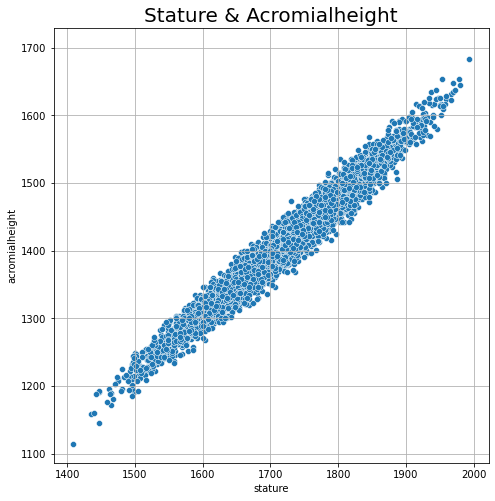

In [32]:
print(df[["stature", "acromialheight"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "stature", y = "acromialheight", data=df)
plt.axis('square')
plt.title("Stature & Acromialheight", size=20)
plt.grid();

In [33]:
df.drop("Heightin", axis=1, inplace=True)

### weightkg & Weightlbs
Weight (in kg*10),
Weightlbs (in ibs)

In [34]:
df[["weightkg", "Weightlbs"]]

,weightkg,Weightlbs
0,657,142
1,534,120
2,663,147
3,782,175
4,886,195
...,...,...
6063,675,160
6064,896,194
6065,832,186
6066,731,165


In [35]:
# 1 lbs = 0,45 kg
df.Weightlbs = df.Weightlbs.apply(lambda x : x * 0.45)
df.weightkg = df.weightkg.apply(lambda x : x / 10)

           weightkg  Weightlbs
weightkg   1.000000   0.978361
Weightlbs  0.978361   1.000000


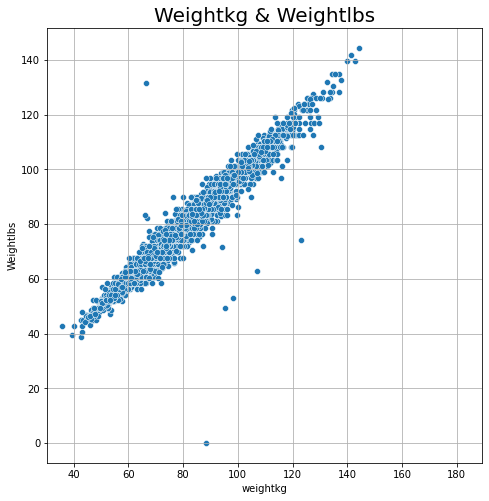

In [36]:
print(df[["weightkg", "Weightlbs"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "weightkg", y = "Weightlbs", data=df)
plt.axis('square')
plt.title("Weightkg & Weightlbs", size=20)
plt.grid();

In [37]:
weightlbs_corr = {}
for i in df.select_dtypes(exclude="object") :
    if df.Weightlbs.corr(df[i]) > 0.9 :
        weightlbs_corr["Weightlbs Corr with "+ i] = df.Weightlbs.corr(df[i])
weightlbs_corr

{'Weightlbs Corr with weightkg': 0.9783608819603068,
 'Weightlbs Corr with Weightlbs': 1.0}

                acromialheight  Weightlbs
acromialheight        1.000000   0.702188
Weightlbs             0.702188   1.000000


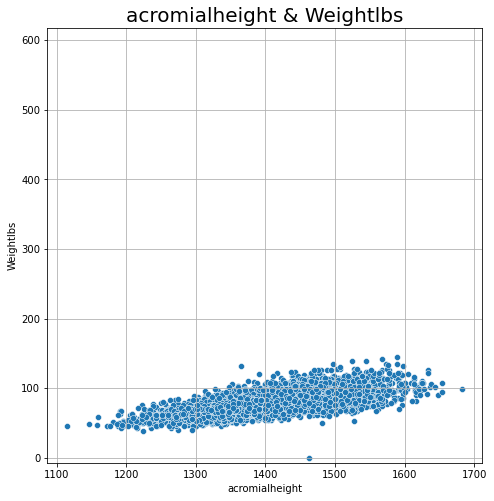

In [38]:
print(df[["acromialheight", "Weightlbs"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "acromialheight", y = "Weightlbs", data=df)
plt.axis('square')
plt.title("acromialheight & Weightlbs", size=20)
plt.grid();

                acromialheight  weightkg
acromialheight         1.00000   0.68461
weightkg               0.68461   1.00000


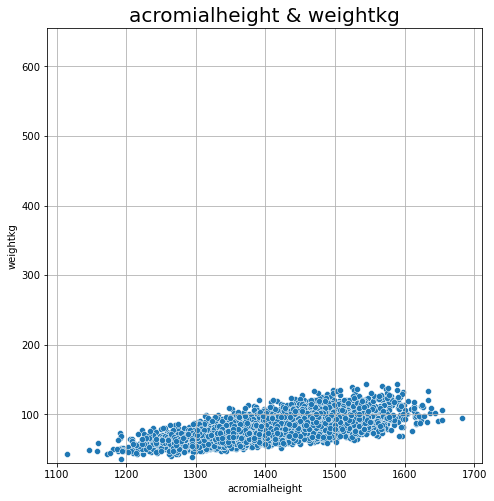

In [39]:
print(df[["acromialheight", "weightkg"]].corr())

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = "acromialheight", y = "weightkg", data=df)
plt.axis('square')
plt.title("acromialheight & weightkg", size=20)
plt.grid();

In [40]:
df.drop("Weightlbs", axis=1, inplace=True)

In [41]:
corr_9 = {}
for column in df.select_dtypes(include="number").columns:
    for column2 in df.select_dtypes(include="number").drop(column, axis=1).columns[1:] :
        corr = round(df[column].corr(df[column2]), 2)
        if corr >= 0.9 :
            corr_9[column + " - " + column2] = corr
corr_9

{'abdominalextensiondepthsitting - waistcircumference': 0.94,
 'abdominalextensiondepthsitting - waistdepth': 0.96,
 'acromialheight - axillaheight': 0.99,
 'acromialheight - cervicaleheight': 0.98,
 'acromialheight - chestheight': 0.96,
 'acromialheight - crotchheight': 0.9,
 'acromialheight - functionalleglength': 0.9,
 'acromialheight - iliocristaleheight': 0.93,
 'acromialheight - kneeheightmidpatella': 0.9,
 'acromialheight - kneeheightsitting': 0.93,
 'acromialheight - poplitealheight': 0.9,
 'acromialheight - stature': 0.98,
 'acromialheight - suprasternaleheight': 0.99,
 'acromialheight - tenthribheight': 0.95,
 'acromialheight - waistheightomphalion': 0.93,
 'acromialheight - wristheight': 0.92,
 'acromionradialelength - shoulderelbowlength': 0.97,
 'acromionradialelength - sleeveoutseam': 0.94,
 'acromionradialelength - span': 0.9,
 'axillaheight - acromialheight': 0.99,
 'axillaheight - cervicaleheight': 0.98,
 'axillaheight - chestheight': 0.96,
 'axillaheight - crotchheigh

## If we drop the Multicorrelation columns

### stature

In [42]:
corr_9 = {}
for column in df.select_dtypes(include="number").columns:
    corr = round(df["stature"].corr(df[column]), 2)
    if corr >= 0.9 :
        corr_9["stature - "  + column] = corr
corr_9

{'stature - acromialheight': 0.98,
 'stature - axillaheight': 0.98,
 'stature - cervicaleheight': 0.99,
 'stature - chestheight': 0.97,
 'stature - crotchheight': 0.9,
 'stature - iliocristaleheight': 0.93,
 'stature - kneeheightsitting': 0.93,
 'stature - poplitealheight': 0.9,
 'stature - span': 0.9,
 'stature - stature': 1.0,
 'stature - suprasternaleheight': 0.99,
 'stature - tenthribheight': 0.93,
 'stature - waistheightomphalion': 0.94}

In [43]:
df.drop(columns=["acromialheight",
                "axillaheight",
                "cervicaleheight",
                "chestheight",
                "crotchheight",
                "suprasternaleheight",
                "tenthribheight",
                "waistheightomphalion"], inplace= True)

In [44]:
corr_9 = {}
for column in df.select_dtypes(include="number").columns:
    for column2 in df.select_dtypes(include="number").drop(column, axis=1).columns[1:] :
        corr = round(df[column].corr(df[column2]), 2)
        if corr >= 0.9 :
            corr_9[column + " - " + column2] = corr
corr_9

{'abdominalextensiondepthsitting - waistcircumference': 0.94,
 'abdominalextensiondepthsitting - waistdepth': 0.96,
 'acromionradialelength - shoulderelbowlength': 0.97,
 'acromionradialelength - sleeveoutseam': 0.94,
 'acromionradialelength - span': 0.9,
 'balloffootcircumference - footbreadthhorizontal': 0.92,
 'balloffootlength - footlength': 0.96,
 'biacromialbreadth - shouldercircumference': 0.9,
 'bicepscircumferenceflexed - forearmcircumferenceflexed': 0.91,
 'bideltoidbreadth - chestcircumference': 0.9,
 'bideltoidbreadth - forearmforearmbreadth': 0.93,
 'bideltoidbreadth - shouldercircumference': 0.95,
 'bideltoidbreadth - weightkg': 0.91,
 'buttockcircumference - hipbreadth': 0.92,
 'buttockcircumference - hipbreadthsitting': 0.9,
 'buttockcircumference - thighcircumference': 0.94,
 'buttockheight - iliocristaleheight': 0.93,
 'buttockheight - kneeheightmidpatella': 0.92,
 'buttockheight - kneeheightsitting': 0.9,
 'buttockheight - lateralfemoralepicondyleheight': 0.9,
 'butt

### Leg measurement

In [45]:
leg_height = ["iliocristaleheight", "kneeheightsitting", "kneeheightmidpatella",
              "poplitealheight","functionalleglength", "trochanterionheight", 
              "tibialheight", "buttockpopliteallength", "buttockkneelength",
              "lateralfemoralepicondyleheight", "buttockheight"]
len(leg_height)
# vertical leg measurements measured from the hip, leg, and knee points

11

In [46]:
# Let's look at the correlation of the selected leg measurements within themselves
corr_leg_9 = {}
max_corr = {}

for height in leg_height :
    number_corr = 0
    for column in leg_height:
        corr = round(df[height].corr(df[column]), 2)
        if corr >= 0.9 :
            corr_leg_9[height + " - "  + column] = corr
            number_corr += 1
    max_corr[height] = number_corr
    
max_corr

{'iliocristaleheight': 8,
 'kneeheightsitting': 9,
 'kneeheightmidpatella': 8,
 'poplitealheight': 6,
 'functionalleglength': 2,
 'trochanterionheight': 7,
 'tibialheight': 8,
 'buttockpopliteallength': 2,
 'buttockkneelength': 2,
 'lateralfemoralepicondyleheight': 8,
 'buttockheight': 7}

In [47]:
#  Let's look at the correlation of selected leg measurements with other columns that may be overlooked.
corr_leg_body_9 = {}
max_corr = {}

for height in leg_height :
    number_corr = 0
    for column in df.select_dtypes(include="number").columns:
        corr = round(df[height].corr(df[column]), 2)
        if corr >= 0.9 :
            corr_leg_body_9[height + " - "  + column] = corr
            number_corr += 1
    max_corr[height] = number_corr
    
max_corr

{'iliocristaleheight': 9,
 'kneeheightsitting': 13,
 'kneeheightmidpatella': 8,
 'poplitealheight': 7,
 'functionalleglength': 2,
 'trochanterionheight': 7,
 'tibialheight': 8,
 'buttockpopliteallength': 2,
 'buttockkneelength': 2,
 'lateralfemoralepicondyleheight': 8,
 'buttockheight': 7}

In [48]:
corr_leg_9

{'iliocristaleheight - iliocristaleheight': 1.0,
 'iliocristaleheight - kneeheightsitting': 0.94,
 'iliocristaleheight - kneeheightmidpatella': 0.92,
 'iliocristaleheight - poplitealheight': 0.91,
 'iliocristaleheight - trochanterionheight': 0.93,
 'iliocristaleheight - tibialheight': 0.92,
 'iliocristaleheight - lateralfemoralepicondyleheight': 0.9,
 'iliocristaleheight - buttockheight': 0.93,
 'kneeheightsitting - iliocristaleheight': 0.94,
 'kneeheightsitting - kneeheightsitting': 1.0,
 'kneeheightsitting - kneeheightmidpatella': 0.96,
 'kneeheightsitting - poplitealheight': 0.94,
 'kneeheightsitting - functionalleglength': 0.91,
 'kneeheightsitting - trochanterionheight': 0.92,
 'kneeheightsitting - tibialheight': 0.95,
 'kneeheightsitting - lateralfemoralepicondyleheight': 0.93,
 'kneeheightsitting - buttockheight': 0.9,
 'kneeheightmidpatella - iliocristaleheight': 0.92,
 'kneeheightmidpatella - kneeheightsitting': 0.96,
 'kneeheightmidpatella - kneeheightmidpatella': 1.0,
 'knee

In [49]:
corr_leg_body_9

{'iliocristaleheight - buttockheight': 0.93,
 'iliocristaleheight - iliocristaleheight': 1.0,
 'iliocristaleheight - kneeheightmidpatella': 0.92,
 'iliocristaleheight - kneeheightsitting': 0.94,
 'iliocristaleheight - lateralfemoralepicondyleheight': 0.9,
 'iliocristaleheight - poplitealheight': 0.91,
 'iliocristaleheight - stature': 0.93,
 'iliocristaleheight - tibialheight': 0.92,
 'iliocristaleheight - trochanterionheight': 0.93,
 'kneeheightsitting - buttockheight': 0.9,
 'kneeheightsitting - forearmhandlength': 0.91,
 'kneeheightsitting - functionalleglength': 0.91,
 'kneeheightsitting - iliocristaleheight': 0.94,
 'kneeheightsitting - kneeheightmidpatella': 0.96,
 'kneeheightsitting - kneeheightsitting': 1.0,
 'kneeheightsitting - lateralfemoralepicondyleheight': 0.93,
 'kneeheightsitting - poplitealheight': 0.94,
 'kneeheightsitting - sleeveoutseam': 0.9,
 'kneeheightsitting - span': 0.91,
 'kneeheightsitting - stature': 0.93,
 'kneeheightsitting - tibialheight': 0.95,
 'kneehei

In [50]:
df[["iliocristaleheight" ,  "kneeheightsitting"]]

,iliocristaleheight,kneeheightsitting
0,966,496
1,1048,532
2,1043,530
3,1029,520
4,964,491
...,...,...
6063,1025,523
6064,1057,565
6065,1032,527
6066,1050,542


In [51]:
# Don't drop these leg measurement "buttockpopliteallength", "buttockkneelength". There aren't high corr.
df.drop(columns=["iliocristaleheight", "kneeheightsitting", "kneeheightmidpatella",
              "poplitealheight","functionalleglength", "trochanterionheight", 
              "tibialheight", "lateralfemoralepicondyleheight", "buttockheight"], inplace=True)

In [52]:
corr_9 = {}
for column in df.select_dtypes(include="number").columns:
    for column2 in df.select_dtypes(include="number").drop(column, axis=1).columns[1:] :
        corr = round(df[column].corr(df[column2]), 2)
        if corr >= 0.9 :
            corr_9[column + " - " + column2] = corr

corr_9

{'abdominalextensiondepthsitting - waistcircumference': 0.94,
 'abdominalextensiondepthsitting - waistdepth': 0.96,
 'acromionradialelength - shoulderelbowlength': 0.97,
 'acromionradialelength - sleeveoutseam': 0.94,
 'acromionradialelength - span': 0.9,
 'balloffootcircumference - footbreadthhorizontal': 0.92,
 'balloffootlength - footlength': 0.96,
 'biacromialbreadth - shouldercircumference': 0.9,
 'bicepscircumferenceflexed - forearmcircumferenceflexed': 0.91,
 'bideltoidbreadth - chestcircumference': 0.9,
 'bideltoidbreadth - forearmforearmbreadth': 0.93,
 'bideltoidbreadth - shouldercircumference': 0.95,
 'bideltoidbreadth - weightkg': 0.91,
 'buttockcircumference - hipbreadth': 0.92,
 'buttockcircumference - hipbreadthsitting': 0.9,
 'buttockcircumference - thighcircumference': 0.94,
 'buttockkneelength - buttockpopliteallength': 0.95,
 'buttockpopliteallength - buttockkneelength': 0.95,
 'chestcircumference - bideltoidbreadth': 0.9,
 'chestcircumference - weightkg': 0.92,
 'ey

### Arm measurement

In [53]:
# arm measurements measured from elbow, shoulder and fingertip points
arm_length = ["shoulderelbowlength",
            "sleevelengthspinewrist",
            "sleeveoutseam",
            "span",
            "thumbtipreach",
            "acromionradialelength",
            "forearmcenterofgriplength",
            "forearmhandlength",
            "radialestylionlength"]
len(arm_length)

9

In [54]:
# Let's look at the correlation of the selected arm measurements within themselves
corr_arm_9 = {}
max_corr = {}

for length in arm_length :
    number_corr = 0
    for column in arm_length:
        corr = round(df[length].corr(df[column]), 2)
        if corr >= 0.9 :
            corr_arm_9[length + " - "  + column] = corr
            number_corr += 1
    max_corr[length] = number_corr
    
max_corr

{'shoulderelbowlength': 5,
 'sleevelengthspinewrist': 5,
 'sleeveoutseam': 7,
 'span': 8,
 'thumbtipreach': 1,
 'acromionradialelength': 4,
 'forearmcenterofgriplength': 4,
 'forearmhandlength': 6,
 'radialestylionlength': 5}

In [55]:
# Let's look at the correlation of selected arm measurements with other columns that may be overlooked.
corr_arm_body_9 = {}
max_corr = {}

for length in arm_length :
    number_corr = 0
    for column in df.select_dtypes(include="number").columns:
        corr = round(df[length].corr(df[column]), 2)
        if corr >= 0.9 :
            corr_arm_body_9[length + " - "  + column] = corr
            number_corr += 1
    max_corr[length] = number_corr
    
max_corr

{'shoulderelbowlength': 5,
 'sleevelengthspinewrist': 5,
 'sleeveoutseam': 7,
 'span': 9,
 'thumbtipreach': 1,
 'acromionradialelength': 4,
 'forearmcenterofgriplength': 4,
 'forearmhandlength': 7,
 'radialestylionlength': 5}

In [56]:
corr_arm_9

{'shoulderelbowlength - shoulderelbowlength': 1.0,
 'shoulderelbowlength - sleevelengthspinewrist': 0.9,
 'shoulderelbowlength - sleeveoutseam': 0.94,
 'shoulderelbowlength - span': 0.92,
 'shoulderelbowlength - acromionradialelength': 0.97,
 'sleevelengthspinewrist - shoulderelbowlength': 0.9,
 'sleevelengthspinewrist - sleevelengthspinewrist': 1.0,
 'sleevelengthspinewrist - sleeveoutseam': 0.91,
 'sleevelengthspinewrist - span': 0.93,
 'sleevelengthspinewrist - forearmhandlength': 0.9,
 'sleeveoutseam - shoulderelbowlength': 0.94,
 'sleeveoutseam - sleevelengthspinewrist': 0.91,
 'sleeveoutseam - sleeveoutseam': 1.0,
 'sleeveoutseam - span': 0.94,
 'sleeveoutseam - acromionradialelength': 0.94,
 'sleeveoutseam - forearmhandlength': 0.91,
 'sleeveoutseam - radialestylionlength': 0.91,
 'span - shoulderelbowlength': 0.92,
 'span - sleevelengthspinewrist': 0.93,
 'span - sleeveoutseam': 0.94,
 'span - span': 1.0,
 'span - acromionradialelength': 0.9,
 'span - forearmcenterofgriplength'

In [57]:
corr_arm_body_9

{'shoulderelbowlength - acromionradialelength': 0.97,
 'shoulderelbowlength - shoulderelbowlength': 1.0,
 'shoulderelbowlength - sleevelengthspinewrist': 0.9,
 'shoulderelbowlength - sleeveoutseam': 0.94,
 'shoulderelbowlength - span': 0.92,
 'sleevelengthspinewrist - forearmhandlength': 0.9,
 'sleevelengthspinewrist - shoulderelbowlength': 0.9,
 'sleevelengthspinewrist - sleevelengthspinewrist': 1.0,
 'sleevelengthspinewrist - sleeveoutseam': 0.91,
 'sleevelengthspinewrist - span': 0.93,
 'sleeveoutseam - acromionradialelength': 0.94,
 'sleeveoutseam - forearmhandlength': 0.91,
 'sleeveoutseam - radialestylionlength': 0.91,
 'sleeveoutseam - shoulderelbowlength': 0.94,
 'sleeveoutseam - sleevelengthspinewrist': 0.91,
 'sleeveoutseam - sleeveoutseam': 1.0,
 'sleeveoutseam - span': 0.94,
 'span - acromionradialelength': 0.9,
 'span - forearmcenterofgriplength': 0.93,
 'span - forearmhandlength': 0.95,
 'span - radialestylionlength': 0.91,
 'span - shoulderelbowlength': 0.92,
 'span - sl

"shoulderelbowlength", "sleevelengthspinewrist", "sleeveoutseam", 
"acromionradialelength", "forearmcenterofgriplength","radialestylionlength"
 
The above columns are only correlated within themselves and this correlation strongly correlates with span.             
The "forearmhandlength" column is only related to the handlength column, apart from the above correlation. We can continue the remainder analysis with just the handlength column.

The "thumbtipreach" column has no correlation at all.

Continue the analysis with only the "span" and "thumbtipreach" columns

In [58]:
df.drop(columns=['shoulderelbowlength',
                 'sleevelengthspinewrist',
                 'sleeveoutseam',
                 'acromionradialelength',
                 'forearmcenterofgriplength',
                 'forearmhandlength',
                 'radialestylionlength'], inplace=True)

In [59]:
corr_9 = {}
for column in df.select_dtypes(include="number").columns:
    for column2 in df.select_dtypes(include="number").drop(column, axis=1).columns[1:] :
        corr = round(df[column].corr(df[column2]), 2)
        if corr >= 0.9 :
            corr_9[column + " - " + column2] = corr

corr_9

{'abdominalextensiondepthsitting - waistcircumference': 0.94,
 'abdominalextensiondepthsitting - waistdepth': 0.96,
 'balloffootcircumference - footbreadthhorizontal': 0.92,
 'balloffootlength - footlength': 0.96,
 'biacromialbreadth - shouldercircumference': 0.9,
 'bicepscircumferenceflexed - forearmcircumferenceflexed': 0.91,
 'bideltoidbreadth - chestcircumference': 0.9,
 'bideltoidbreadth - forearmforearmbreadth': 0.93,
 'bideltoidbreadth - shouldercircumference': 0.95,
 'bideltoidbreadth - weightkg': 0.91,
 'buttockcircumference - hipbreadth': 0.92,
 'buttockcircumference - hipbreadthsitting': 0.9,
 'buttockcircumference - thighcircumference': 0.94,
 'buttockkneelength - buttockpopliteallength': 0.95,
 'buttockpopliteallength - buttockkneelength': 0.95,
 'chestcircumference - bideltoidbreadth': 0.9,
 'chestcircumference - weightkg': 0.92,
 'eyeheightsitting - sittingheight': 0.98,
 'footbreadthhorizontal - balloffootcircumference': 0.92,
 'footlength - balloffootlength': 0.96,
 'f

### Shoulder measurement

In [60]:
shoulder_breadth = ["biacromialbreadth", "bideltoidbreadth", "shouldercircumference", 
                    "shoulderlength", "forearmforearmbreadth" ]
len(shoulder_breadth)

5

In [61]:
# Let's look at the correlation of the selected arm measurements within themselves
corr_shl_9 = {}
max_corr = {}

for breadth in shoulder_breadth :
    number_corr = 0
    for column in shoulder_breadth:
        corr = round(df[breadth].corr(df[column]), 2)
        if corr >= 0.9 :
            corr_shl_9[breadth + " - "  + column] = corr
            number_corr += 1
    max_corr[breadth] = number_corr
    
max_corr

{'biacromialbreadth': 2,
 'bideltoidbreadth': 3,
 'shouldercircumference': 3,
 'shoulderlength': 1,
 'forearmforearmbreadth': 2}

In [62]:
# Let's look at the correlation of selected arm measurements with other columns that may be overlooked.
corr_shl_body_9 = {}
max_corr = {}

for breadth in shoulder_breadth :
    number_corr = 0
    for column in df.select_dtypes(include="number").columns:
        corr = round(df[breadth].corr(df[column]), 2)
        if corr >= 0.9 :
            corr_shl_body_9[breadth + " - "  + column] = corr
            number_corr += 1
    max_corr[breadth] = number_corr
    
max_corr

{'biacromialbreadth': 2,
 'bideltoidbreadth': 5,
 'shouldercircumference': 6,
 'shoulderlength': 1,
 'forearmforearmbreadth': 2}

In [63]:
corr_shl_9

{'biacromialbreadth - biacromialbreadth': 1.0,
 'biacromialbreadth - shouldercircumference': 0.9,
 'bideltoidbreadth - bideltoidbreadth': 1.0,
 'bideltoidbreadth - shouldercircumference': 0.95,
 'bideltoidbreadth - forearmforearmbreadth': 0.93,
 'shouldercircumference - biacromialbreadth': 0.9,
 'shouldercircumference - bideltoidbreadth': 0.95,
 'shouldercircumference - shouldercircumference': 1.0,
 'shoulderlength - shoulderlength': 1.0,
 'forearmforearmbreadth - bideltoidbreadth': 0.93,
 'forearmforearmbreadth - forearmforearmbreadth': 1.0}

In [64]:
corr_shl_body_9

{'biacromialbreadth - biacromialbreadth': 1.0,
 'biacromialbreadth - shouldercircumference': 0.9,
 'bideltoidbreadth - bideltoidbreadth': 1.0,
 'bideltoidbreadth - chestcircumference': 0.9,
 'bideltoidbreadth - forearmforearmbreadth': 0.93,
 'bideltoidbreadth - shouldercircumference': 0.95,
 'bideltoidbreadth - weightkg': 0.91,
 'shouldercircumference - biacromialbreadth': 0.9,
 'shouldercircumference - bideltoidbreadth': 0.95,
 'shouldercircumference - forearmcircumferenceflexed': 0.9,
 'shouldercircumference - neckcircumference': 0.9,
 'shouldercircumference - neckcircumferencebase': 0.9,
 'shouldercircumference - shouldercircumference': 1.0,
 'shoulderlength - shoulderlength': 1.0,
 'forearmforearmbreadth - bideltoidbreadth': 0.93,
 'forearmforearmbreadth - forearmforearmbreadth': 1.0}

**"shouldercircumference" column can represent "biacromialbreadth", "bideltoidbreadth" and "forearmforearmbreadth" column. We can drop other columns.**

**Another point that draws our attention is a correlation between "bideltoidbreadth" and "chestcircumference". In the next stage of the analysis, we can continue with "chestcircumference"**

In [65]:
df.drop(columns=["biacromialbreadth", "bideltoidbreadth" , "forearmforearmbreadth"], inplace=True)

### Waist measurement

In [66]:
waist_measurement = ["abdominalextensiondepthsitting", "waistcircumference", "waistdepth","waistbreadth"]
len(waist_measurement)

4

In [67]:
# Let's look at the correlation of the selected waist measurements within themselves
corr_waist_9 = {}
max_corr = {}

for breadth in waist_measurement :
    number_corr = 0
    for column in waist_measurement:
        corr = round(df[breadth].corr(df[column]), 2)
        if corr >= 0.9 :
            corr_waist_9[breadth + " - "  + column] = corr
            number_corr += 1
    max_corr[breadth] = number_corr
    
max_corr

{'abdominalextensiondepthsitting': 3,
 'waistcircumference': 4,
 'waistdepth': 3,
 'waistbreadth': 2}

In [68]:
# Let's look at the correlation of selected waist measurements with other columns that may be overlooked.
corr_waist_body_9 = {}
max_corr = {}

for breadth in waist_measurement :
    number_corr = 0
    for column in df.select_dtypes(include="number").columns:
        corr = round(df[breadth].corr(df[column]), 2)
        if corr >= 0.9 :
            corr_waist_body_9[breadth + " - "  + column] = corr
            number_corr += 1
    max_corr[breadth] = number_corr
    
max_corr

{'abdominalextensiondepthsitting': 3,
 'waistcircumference': 4,
 'waistdepth': 3,
 'waistbreadth': 2}

In [69]:
corr_waist_9

{'abdominalextensiondepthsitting - abdominalextensiondepthsitting': 1.0,
 'abdominalextensiondepthsitting - waistcircumference': 0.94,
 'abdominalextensiondepthsitting - waistdepth': 0.96,
 'waistcircumference - abdominalextensiondepthsitting': 0.94,
 'waistcircumference - waistcircumference': 1.0,
 'waistcircumference - waistdepth': 0.95,
 'waistcircumference - waistbreadth': 0.96,
 'waistdepth - abdominalextensiondepthsitting': 0.96,
 'waistdepth - waistcircumference': 0.95,
 'waistdepth - waistdepth': 1.0,
 'waistbreadth - waistcircumference': 0.96,
 'waistbreadth - waistbreadth': 1.0}

In [70]:
corr_waist_body_9

{'abdominalextensiondepthsitting - abdominalextensiondepthsitting': 1.0,
 'abdominalextensiondepthsitting - waistcircumference': 0.94,
 'abdominalextensiondepthsitting - waistdepth': 0.96,
 'waistcircumference - abdominalextensiondepthsitting': 0.94,
 'waistcircumference - waistbreadth': 0.96,
 'waistcircumference - waistcircumference': 1.0,
 'waistcircumference - waistdepth': 0.95,
 'waistdepth - abdominalextensiondepthsitting': 0.96,
 'waistdepth - waistcircumference': 0.95,
 'waistdepth - waistdepth': 1.0,
 'waistbreadth - waistbreadth': 1.0,
 'waistbreadth - waistcircumference': 0.96}

**"waistcircumference" can represent all other columns.**

In [71]:
df.drop(columns=["abdominalextensiondepthsitting", "waistdepth","waistbreadth"], inplace=True)

### Neck and related ones

In [72]:
df[["shouldercircumference" , "neckcircumference" , "neckcircumferencebase", "forearmcircumferenceflexed"]].corr()


,shouldercircumference,neckcircumference,neckcircumferencebase,forearmcircumferenceflexed
shouldercircumference,1.000000,0.899391,0.895031,0.897866
neckcircumference,0.899391,1.000000,0.969489,0.880510
neckcircumferencebase,0.895031,0.969489,1.000000,0.863571
forearmcircumferenceflexed,0.897866,0.880510,0.863571,1.000000


There is a correlation between the "neck circumference" and "neck circumference base" columns. A column should be left to represent the neck information.

There is a high correlation between the "shoulder circumference" and "forearm circumferenceflexed" columns. The analysis can be continued with the "shoulder circumference".

In [73]:
df.drop(columns=["neckcircumferencebase", "forearmcircumferenceflexed"], inplace=True)

### Buttock and related ones

In [74]:
df[["buttockcircumference", "hipbreadth", "hipbreadthsitting", "thighcircumference" ]].corr()

,buttockcircumference,hipbreadth,hipbreadthsitting,thighcircumference
buttockcircumference,1.000000,0.924851,0.900228,0.938459
hipbreadth,0.924851,1.000000,0.917297,0.813506
hipbreadthsitting,0.900228,0.917297,1.000000,0.834124
thighcircumference,0.938459,0.813506,0.834124,1.000000


"buttockcircumference" represents other columns

In [75]:
df.drop(columns=["hipbreadth", "hipbreadthsitting", "thighcircumference"], inplace=True)

### Examine rest of the related columns 

In [76]:
corr_9 = {}
for column in df.select_dtypes(include="number").columns:
    for column2 in df.select_dtypes(include="number").drop(column, axis=1).columns[1:] :
        corr = round(df[column].corr(df[column2]), 2)
        if corr >= 0.9 :
            corr_9[column + " - " + column2] = corr

corr_9

{'balloffootcircumference - footbreadthhorizontal': 0.92,
 'balloffootlength - footlength': 0.96,
 'buttockkneelength - buttockpopliteallength': 0.95,
 'buttockpopliteallength - buttockkneelength': 0.95,
 'chestcircumference - weightkg': 0.92,
 'eyeheightsitting - sittingheight': 0.98,
 'footbreadthhorizontal - balloffootcircumference': 0.92,
 'footlength - balloffootlength': 0.96,
 'handbreadth - handcircumference': 0.96,
 'handcircumference - handbreadth': 0.96,
 'handcircumference - wristcircumference': 0.9,
 'interscyei - interscyeii': 0.96,
 'interscyeii - interscyei': 0.96,
 'neckcircumference - shouldercircumference': 0.9,
 'shouldercircumference - neckcircumference': 0.9,
 'sittingheight - eyeheightsitting': 0.98,
 'span - stature': 0.9,
 'stature - span': 0.9,
 'verticaltrunkcircumferenceusa - weightkg': 0.9,
 'weightkg - chestcircumference': 0.92,
 'weightkg - verticaltrunkcircumferenceusa': 0.9,
 'wristcircumference - handcircumference': 0.9}

In [77]:
df.drop(columns=["balloffootcircumference", "balloffootlength", "buttockpopliteallength", 
                 "eyeheightsitting", "interscyeii"], inplace=True)

## Explore Categorical Data

In [78]:
df.select_dtypes(include="object")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,NaN,Right hand
1,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Mexican,Right hand
2,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,NaN,Right hand
3,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Caribbean Islander,Right hand
4,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,Blackfoot Cherokee Choctaw,Right hand
6064,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,NaN,Right hand
6065,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,NaN,Right hand
6066,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,NaN,Right hand


### DODRace
Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [79]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [80]:
df = df[(df.DODRace != 4) & (df.DODRace != 5) & (df.DODRace != 6) & (df.DODRace != 8)]
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

### Rest of Categorical Features

We don't need the "Date" column for this project.

Too many missing values in the "Ethnicity" column.

There is no significant relationship between "PrimaryMOS" and "DODRace". Check out the codes below

In [81]:
df.groupby(["Installation"]).PrimaryMOS.describe()

,count,unique,top,freq
Installation,,,,
Camp Atterbury,432,84,11B,117
Camp Shelby,1111,124,11B,208
Fort Bliss,925,135,31B,108
Fort Bragg,373,63,11B,76
Fort Drum,369,81,11B,54
Fort Gordon,636,70,25B,121
Fort Hood,416,84,74D,36
Fort Huachuca,404,65,35D,96
Fort Lee,356,49,92A,86


In [82]:
df.groupby(["DODRace"]).PrimaryMOS.describe()

,count,unique,top,freq
DODRace,,,,
1,3792,248,11B,500
2,1298,148,92A,132
3,679,114,11B,76


"Installation" information is fairly homogeneously distributed in the target column. A specific pattern could not be captured. Check out the codes below

In [83]:
df.Installation.value_counts()

Camp Shelby       1111
Fort Bliss         925
Fort Gordon        636
Camp Atterbury     432
Fort McCoy         432
Fort Hood          416
Fort Huachuca      404
Fort Bragg         373
Fort Drum          369
Fort Lee           356
Fort Stewart       314
Fort Rucker          1
Name: Installation, dtype: int64

In [84]:
df.groupby(["DODRace"]).Installation.describe()

,count,unique,top,freq
DODRace,,,,
1,3792,12,Camp Shelby,776
2,1298,11,Camp Shelby,238
3,679,11,Fort Bliss,124


In [85]:
df.groupby(["DODRace","Installation"]).Installation.describe()

count unique             top freq
DODRace Installation                                    
1       Camp Atterbury   338      1  Camp Atterbury  338
        Camp Shelby      776      1     Camp Shelby  776
        Fort Bliss       624      1      Fort Bliss  624
        Fort Bragg       217      1      Fort Bragg  217
        Fort Drum        249      1       Fort Drum  249
        Fort Gordon      352      1     Fort Gordon  352
        Fort Hood        284      1       Fort Hood  284
        Fort Huachuca    314      1   Fort Huachuca  314
        Fort Lee         151      1        Fort Lee  151
        Fort McCoy       344      1      Fort McCoy  344
        Fort Rucker        1      1     Fort Rucker    1
        Fort Stewart     142      1    Fort Stewart  142
2       Camp Atterbury    77      1  Camp Atterbury   77
        Camp Shelby      238      1     Camp Shelby  238
        Fort Bliss       177      1      Fort Bliss  177
        Fort Bragg        90      1      Fort Bragg   90
        Fort Drum         65      1       Fort Drum   65
        Fort Gordon      207      1     Fort Gordon  207
        Fort Hood         78      1       Fort Hood   78
        Fort Huachuca     51      1   Fort Huachuca   51
        Fort Lee         163      1        Fort Lee  163
        Fort McCoy        27      1      Fort McCoy   27
        Fort Stewart     125      1    Fort Stewart  125
3       Camp Atterbury    17      1  Camp Atterbury   17
        Camp Shelby       97      1     Camp Shelby   97
        Fort Bliss       124      1      Fort Bliss  124
        Fort Bragg        66      1      Fort Bragg   66
        Fort Drum         55      1       Fort Drum   55
        Fort Gordon       77      1     Fort Gordon   77
        Fort Hood         54      1       Fort Hood   54
        Fort Huachuca     39      1   Fort Huachuca   39
        Fort Lee          42      1        Fort Lee   42
        Fort McCoy        61      1      Fort McCoy   61
        Fort Stewart      47      1    Fort Stewart   47

No pattern found between "Component" and target column. Check out the codes below

In [86]:
df.Component.value_counts()

Regular Army           2955
Army National Guard    2607
Army Reserve            207
Name: Component, dtype: int64

In [87]:
df.groupby(["DODRace","Component"]).Component.describe()

count unique                  top  freq
DODRace Component                                                  
1       Army National Guard  1855      1  Army National Guard  1855
        Army Reserve          114      1         Army Reserve   114
        Regular Army         1823      1         Regular Army  1823
2       Army National Guard   499      1  Army National Guard   499
        Army Reserve           52      1         Army Reserve    52
        Regular Army          747      1         Regular Army   747
3       Army National Guard   253      1  Army National Guard   253
        Army Reserve           41      1         Army Reserve    41
        Regular Army          385      1         Regular Army   385

No pattern found between "Branch" and target column. Check out the codes below

In [88]:
df.Branch.value_counts()

Combat Service Support    3021
Combat Arms               1508
Combat Support            1240
Name: Branch, dtype: int64

In [89]:
df.groupby(["DODRace","Branch"]).Branch.describe()

count unique                     top  freq
DODRace Branch                                                           
1       Combat Arms             1146      1             Combat Arms  1146
        Combat Service Support  1911      1  Combat Service Support  1911
        Combat Support           735      1          Combat Support   735
2       Combat Arms              173      1             Combat Arms   173
        Combat Service Support   745      1  Combat Service Support   745
        Combat Support           380      1          Combat Support   380
3       Combat Arms              189      1             Combat Arms   189
        Combat Service Support   365      1  Combat Service Support   365
        Combat Support           125      1          Combat Support   125

Too many different values in the "SubjectsBirthLocation" column. In regions such as "Japan", "South Korea" or "Philippines", race is a defining feature, but the "SubjectsBirthLocation" column is not important in this project as the "DODRace" column will be corrected for the number of values below 500

Note : The codes below were taken before the "DODRace" column was droped some rows which value count below 500.

In [90]:
df[df.SubjectsBirthLocation == "Philippines"]["DODRace"]

536     1
662     2
851     2
2022    1
5860    1
Name: DODRace, dtype: int64

In [91]:
df[df.SubjectsBirthLocation == "South Korea"]["DODRace"]

9    1
Name: DODRace, dtype: int64

No pattern found between "WritingPreference" and target column. Check out the codes below

In [92]:
df.WritingPreference.value_counts(normalize=True)

Right hand                     0.881955
Left hand                      0.107818
Either hand (No preference)    0.010227
Name: WritingPreference, dtype: float64

In [93]:
df.groupby(["DODRace"]).WritingPreference.value_counts(normalize=True)

DODRace  WritingPreference          
1        Right hand                     0.877373
         Left hand                      0.111287
         Either hand (No preference)    0.011340
2        Right hand                     0.874422
         Left hand                      0.115562
         Either hand (No preference)    0.010015
3        Right hand                     0.921944
         Left hand                      0.073638
         Either hand (No preference)    0.004418
Name: WritingPreference, dtype: float64

In [94]:
df.drop(columns=["Date", "Ethnicity", "PrimaryMOS", "Installation",
                 "Component","Branch", "SubjectsBirthLocation", "WritingPreference"], inplace=True)

## Explore Data

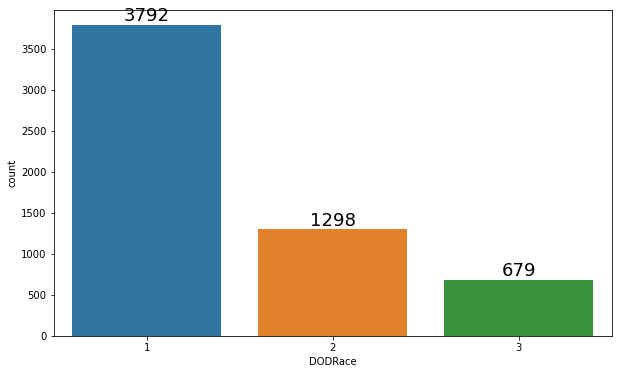

In [95]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df.DODRace)
for i in ax.containers:
    ax.bar_label(i, size=18)

**Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)**

In [96]:
df = df[(df.DODRace != 4) & (df.DODRace != 5) & (df.DODRace != 6) & (df.DODRace != 8)]
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

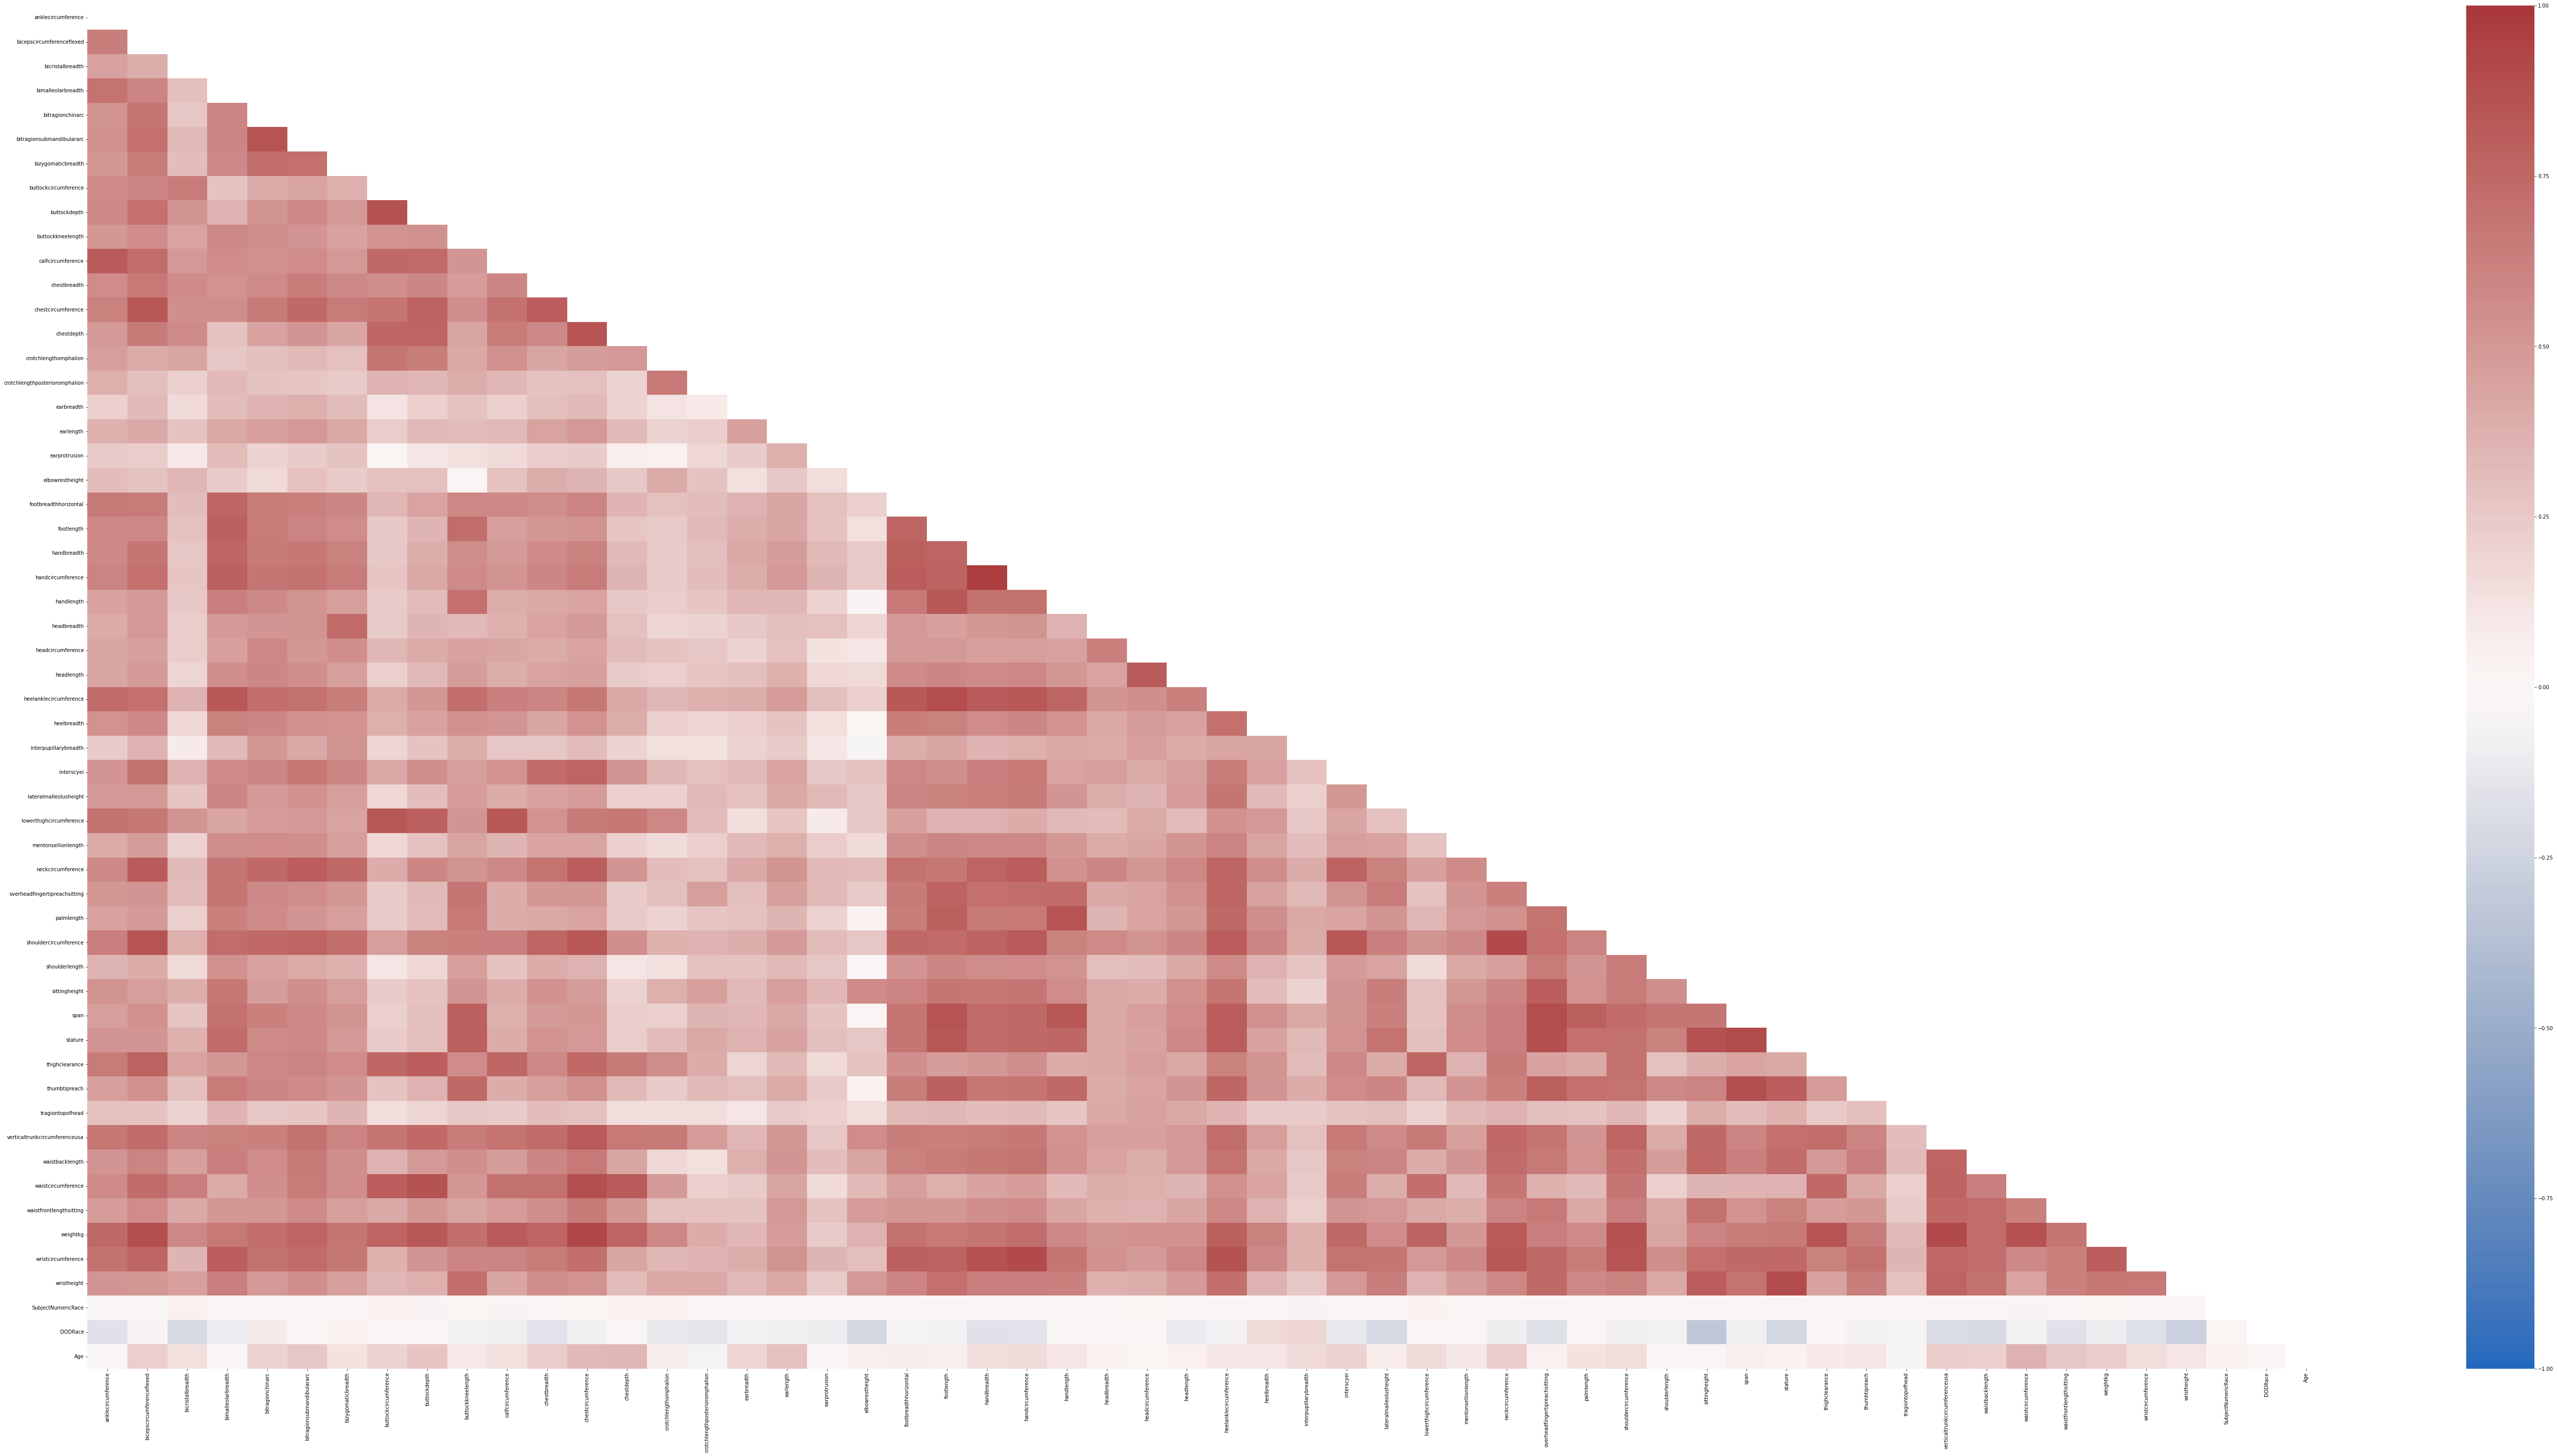

In [97]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(100,50))
sns.heatmap(df.corr(), cmap="vlag",  mask=mask, vmin=-1, vmax=1);

In [98]:
df.DODRace.replace([1,2,3], ["White", "Black", "Hispanic"], inplace=True)

In [205]:
df.drop("SubjectNumericRace", axis=1, inplace=True)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [206]:
X = df.drop("DODRace", axis=1)
y = df.DODRace

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [208]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

### Vanilla Logistic Model

In [209]:
cat_onehot = ['Gender']
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       remainder='passthrough') 

In [210]:
operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression())]

log_pipe = Pipeline(steps=operations)

In [211]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender'])])),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [212]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 383    8   56]
 [  23   56  135]
 [  17   23 1203]]
              precision    recall  f1-score   support

       Black       0.91      0.86      0.88       447
    Hispanic       0.64      0.26      0.37       214
       White       0.86      0.97      0.91      1243

    accuracy                           0.86      1904
   macro avg       0.80      0.70      0.72      1904
weighted avg       0.85      0.86      0.84      1904


Train_Set
[[ 756   15   80]
 [  46  132  287]
 [  34   43 2472]]
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       851
    Hispanic       0.69      0.28      0.40       465
       White       0.87      0.97      0.92      2549

    accuracy                           0.87      3865
   macro avg       0.82      0.71      0.74      3865
weighted avg       0.86      0.87      0.85      3865



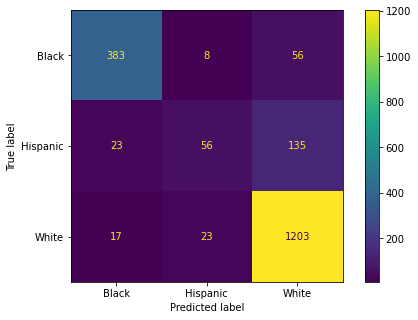

In [213]:
plot_confusion_matrix(log_pipe, X_test, y_test);

### Cros Validation

In [214]:
from sklearn.model_selection import cross_validate

operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression())]

log_cv_model = Pipeline(steps=operations)

scores = cross_validate(log_cv_model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
                                                                   'f1_macro'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.858737
train_accuracy           0.868277
test_precision_macro     0.798416
train_precision_macro    0.821117
test_recall_macro        0.697443
train_recall_macro       0.711655
test_f1_macro            0.719162
train_f1_macro           0.736692
dtype: float64

### Class Prediction

In [215]:
y_pred=log_pipe.predict(X_test)
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

array([[7.37335484e-01, 1.11528290e-01, 1.51136226e-01],
       [2.69392452e-02, 1.06242945e-01, 8.66817810e-01],
       [7.44246336e-03, 6.51045601e-02, 9.27452977e-01],
       ...,
       [7.88131700e-02, 2.37775007e-01, 6.83411823e-01],
       [9.90803250e-01, 1.70290592e-03, 7.49384409e-03],
       [5.93686586e-04, 2.46427274e-02, 9.74763586e-01]])

In [216]:
test_data = pd.DataFrame(y_test)
test_data["pred"] = y_pred
test_data["pred_proba_Black"] = y_pred_proba[:,0]
test_data["pred_proba_Hispanic"] = y_pred_proba[:,1]
test_data["pred_proba_White"] = y_pred_proba[:,2]
test_data.sample(10)


,DODRace,pred,pred_proba_Black,pred_proba_Hispanic,pred_proba_White
25,Hispanic,White,0.203347,0.220346,0.576307
1797,Black,Black,0.866267,0.017911,0.115822
2808,White,White,0.022634,0.033535,0.943831
1103,Black,Black,0.980966,0.017216,0.001817
4756,White,White,0.303770,0.149318,0.546911
2136,White,White,0.000578,0.011372,0.988050
2729,White,White,0.069357,0.038003,0.892640
3788,White,White,0.009171,0.237784,0.753044
4253,Hispanic,Hispanic,0.238323,0.383965,0.377712
5422,White,White,0.000236,0.014860,0.984904


### Logistic Model GridsearchCV

In [217]:
operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

In [218]:
penalty = ["l1", "l2", None]
C = [0.5, 0.6, 0.7, 0.8] 
class_weight= ["balanced", None]
solver = ["liblinear","lbfgs", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C,
             "logistic__class_weight":class_weight,
             "logistic__solver":solver
             }

In [219]:
log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="recall_macro", cv=5, n_jobs=-1, return_train_score=True)
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoders',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.5, 0.6, 0.7, 0.8],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2', None],
                         'logistic__solver': ['liblinear', 'lbfgs', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall_macro')

In [220]:
log_grid_model.best_params_

{'logistic__C': 0.8,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'saga'}

In [221]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[390  41  16]
 [ 22 150  42]
 [ 30 258 955]]
              precision    recall  f1-score   support

       Black       0.88      0.87      0.88       447
    Hispanic       0.33      0.70      0.45       214
       White       0.94      0.77      0.85      1243

    accuracy                           0.79      1904
   macro avg       0.72      0.78      0.73      1904
weighted avg       0.86      0.79      0.81      1904


Train_Set
[[ 757   68   26]
 [  42  329   94]
 [  69  450 2030]]
              precision    recall  f1-score   support

       Black       0.87      0.89      0.88       851
    Hispanic       0.39      0.71      0.50       465
       White       0.94      0.80      0.86      2549

    accuracy                           0.81      3865
   macro avg       0.73      0.80      0.75      3865
weighted avg       0.86      0.81      0.82      3865



### Final logistic model

In [222]:
# Final Logistic model 
operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(penalty="l1", C=0.8, 
                                             class_weight="balanced",
                                             solver="saga"))]

final_log_pipe = Pipeline(steps=operations)
final_log_pipe.fit(X_train,y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender'])])),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=0.8, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

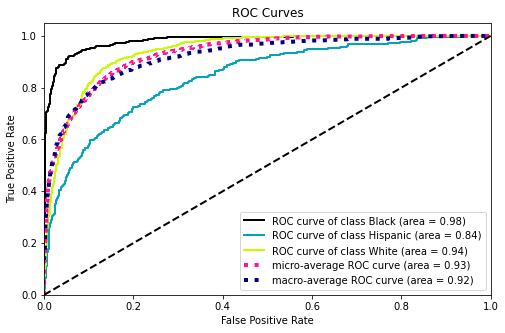

In [223]:
y_pred_proba = final_log_pipe.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [224]:
y_test_dummies = pd.get_dummies(y_test).values
roc_auc_score(y_test_dummies[:,0], y_pred_proba[:,0])

0.981669914122826

In [225]:
roc_auc_score(y_test_dummies[:,1], y_pred_proba[:,1])

0.8419869490681858

In [226]:
roc_auc_score(y_test_dummies[:,2], y_pred_proba[:,2])

0.9384413532727296

###  Precision Recall Curve
It would be correct to look at Precision Recall Curve as it is not a balanced data.

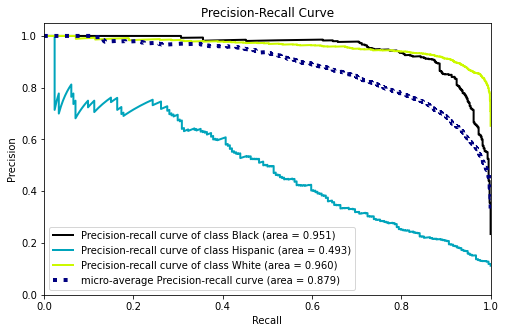

In [227]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [228]:
average_precision_score(y_test_dummies[:, 0], y_pred_proba[:, 0])

0.9511780999341249

In [229]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.49322976635703153

In [230]:
average_precision_score(y_test_dummies[:, 2], y_pred_proba[:, 2])

0.9595199289961396

## 2. SVC

### Vanilla SVC model 

In [231]:
cat_ordinal = ["Gender"]

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("SVC", SVC())]

svc_pipe = Pipeline(steps=operations)
svc_pipe.fit(X_train, y_train)
eval_metric(svc_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 395    2   50]
 [  18   31  165]
 [  13    8 1222]]
              precision    recall  f1-score   support

       Black       0.93      0.88      0.90       447
    Hispanic       0.76      0.14      0.24       214
       White       0.85      0.98      0.91      1243

    accuracy                           0.87      1904
   macro avg       0.84      0.67      0.69      1904
weighted avg       0.86      0.87      0.84      1904


Train_Set
[[ 780    4   67]
 [  43  105  317]
 [  19    8 2522]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       851
    Hispanic       0.90      0.23      0.36       465
       White       0.87      0.99      0.92      2549

    accuracy                           0.88      3865
   macro avg       0.90      0.71      0.74      3865
weighted avg       0.88      0.88      0.86      3865



### Cros Validation

In [232]:
cat_ordinal = ["Gender"]

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("OneHotEncoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("SVC", SVC())]

scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro']

svc_cv_model =  Pipeline(steps=operations)
scores = cross_validate(svc_cv_model, X_train, y_train, scoring = scoring, cv = 10,
                       return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.856664
train_accuracy           0.881271
test_precision_macro     0.833125
train_precision_macro    0.899932
test_recall_macro        0.670574
train_recall_macro       0.707902
test_f1_macro            0.685220
train_f1_macro           0.731999
dtype: float64

###  SVC Model GridsearchCV

In [233]:
param_grid = {'SVC__C': [ 0.75, 1, 1.25],
              'SVC__gamma': ["scale"],
              'SVC__kernel': ['linear', 'poly', 'rbf'],
              'SVC__class_weight': ["balanced"],
              'SVC__degree': [2,3,4]
             }

operations = [("OneHotEncoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("SVC", SVC())]
svc_grid_pipe = Pipeline(steps=operations)

svc_model_grid = GridSearchCV(svc_grid_pipe, param_grid, scoring="recall_macro", cv=10, n_jobs= -1,  return_train_score=True)
svc_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('SVC', SVC())]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.75, 1, 1.25],
                         'SVC__class_weight': ['balanced'],
                         'SVC__degree': [2, 3, 4], 'SVC__gamma': ['scale'],
                         'SVC__kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='recall_macro')

In [234]:
svc_model_grid.best_params_

{'SVC__C': 0.75,
 'SVC__class_weight': 'balanced',
 'SVC__degree': 2,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf'}

In [235]:
eval_metric(svc_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[398  31  18]
 [ 22 138  54]
 [ 32 237 974]]
              precision    recall  f1-score   support

       Black       0.88      0.89      0.89       447
    Hispanic       0.34      0.64      0.45       214
       White       0.93      0.78      0.85      1243

    accuracy                           0.79      1904
   macro avg       0.72      0.77      0.73      1904
weighted avg       0.85      0.79      0.81      1904


Train_Set
[[ 798   31   22]
 [  35  360   70]
 [  49  378 2122]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       851
    Hispanic       0.47      0.77      0.58       465
       White       0.96      0.83      0.89      2549

    accuracy                           0.85      3865
   macro avg       0.78      0.85      0.80      3865
weighted avg       0.89      0.85      0.86      3865



### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [236]:
operations = [("OneHotEncoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("SVC", SVC(gamma="scale", C=0.75,
                         kernel="rbf", 
                         class_weight="balanced",
                         probability=True))]
final_svc_pipe = Pipeline(steps=operations)
final_svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender'])])),
                ('scaler', MinMaxScaler()),
                ('SVC',
                 SVC(C=0.75, class_weight='balanced', probability=True))])

In [237]:
y_pred_proba = final_svc_pipe.decision_function(X_test)

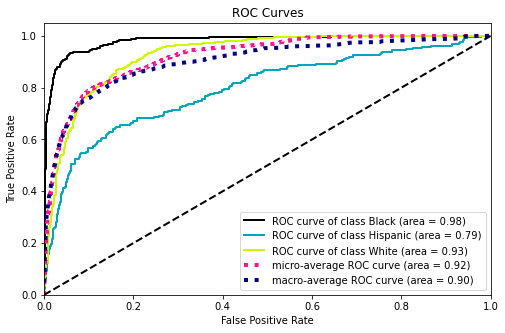

In [238]:
plot_roc(y_test, y_pred_proba)
plt.show();

In [239]:
print("Black")
y_test_dummies = pd.get_dummies(y_test).values
roc_auc_score(y_test_dummies[:,0], y_pred_proba[:,0])

Black


0.9815040865742639

In [240]:
print("Hispanic")
roc_auc_score(y_test_dummies[:,1], y_pred_proba[:,1])

Hispanic


0.7946054305148482

In [241]:
print("White")
roc_auc_score(y_test_dummies[:,2], y_pred_proba[:,2])

White


0.9269823264441234

###  Precision Recall Curve
It would be correct to look at Precision Recall Curve as it is not a balanced data.

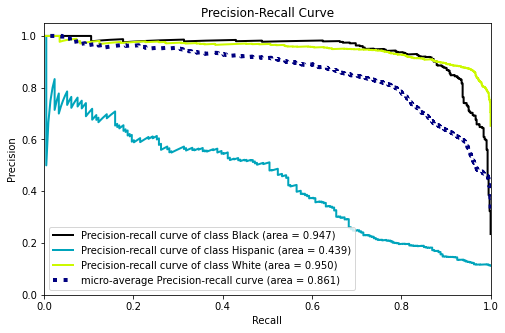

In [242]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [243]:
print("Black")
y_test_dummies = pd.get_dummies(y_test).values
roc_auc_score(y_test_dummies[:,0], y_pred_proba[:,0])

Black


0.9815040865742639

In [244]:
print("Hispanic")
roc_auc_score(y_test_dummies[:,1], y_pred_proba[:,1])

Hispanic


0.7946054305148482

In [245]:
print("White")
roc_auc_score(y_test_dummies[:,2], y_pred_proba[:,2])

White


0.9269823264441234

## 3. RF

### Vanilla RF Model

In [246]:
cat_ordinal = ["Gender"]

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("RF_model", RandomForestClassifier())]

In [247]:
rf_pipe = Pipeline(steps=operations)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender'])])),
                ('RF_model', RandomForestClassifier())])

In [248]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 321    2  124]
 [  25   11  178]
 [  19    3 1221]]
              precision    recall  f1-score   support

       Black       0.88      0.72      0.79       447
    Hispanic       0.69      0.05      0.10       214
       White       0.80      0.98      0.88      1243

    accuracy                           0.82      1904
   macro avg       0.79      0.58      0.59      1904
weighted avg       0.81      0.82      0.77      1904


Train_Set
[[ 851    0    0]
 [   0  465    0]
 [   0    0 2549]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       851
    Hispanic       1.00      1.00      1.00       465
       White       1.00      1.00      1.00      2549

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



### Cros Validation

In [249]:
operations = [("Encoders", column_trans), ("RF_model", RandomForestClassifier())]

rf_cv_model = Pipeline(steps=operations)

scores = cross_validate(rf_cv_model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy            0.820184
train_accuracy           0.999971
test_precision_macro     0.800248
train_precision_macro    0.999985
test_recall_macro        0.598439
train_recall_macro       0.999920
test_f1_macro            0.601444
train_f1_macro           0.999953
dtype: float64

### RF Model GridsearchCV

In [250]:
param_grid = {
             'RF_model__max_features':[50,70,90],
             'RF_model__max_depth':[3,5,7], 
             'RF_model__min_samples_split':[15,20,25],
             'RF_model__max_samples':[0.5, 0,8],
             'RF_model__n_estimators':[64, 128, 200]
                } 


operations = [("Encoders", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced"))]

rf_grid_pipe = Pipeline(steps=operations)

rf_model_grid = GridSearchCV(rf_grid_pipe, param_grid = param_grid , scoring="recall_macro",cv=10, n_jobs= -1, verbose = 1 )
rf_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Encoders',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender'])])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [3, 5, 7],
                         'RF_model__max_features': [50, 70, 90],
                         'RF_model__max_samples': [0.5, 0, 8],
                         'RF_model__min_samples_split': [15, 20, 25],
                         'RF_model__n_estimators': [64, 128, 200]},
             scoring='recall_macro', verbose=1)

In [255]:
rf_model_grid.best_params_

{'RF_model__max_depth': 7,
 'RF_model__max_features': 50,
 'RF_model__max_samples': 0.5,
 'RF_model__min_samples_split': 25,
 'RF_model__n_estimators': 200}

In [252]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[ 352   27   68]
 [  33   95   86]
 [  80  161 1002]]
              precision    recall  f1-score   support

       Black       0.76      0.79      0.77       447
    Hispanic       0.34      0.44      0.38       214
       White       0.87      0.81      0.84      1243

    accuracy                           0.76      1904
   macro avg       0.65      0.68      0.66      1904
weighted avg       0.78      0.76      0.77      1904


Train_Set
[[ 767   25   59]
 [  27  340   98]
 [ 135  216 2198]]
              precision    recall  f1-score   support

       Black       0.83      0.90      0.86       851
    Hispanic       0.59      0.73      0.65       465
       White       0.93      0.86      0.90      2549

    accuracy                           0.86      3865
   macro avg       0.78      0.83      0.80      3865
weighted avg       0.87      0.86      0.86      3865



In [254]:
operations = [("Encoders", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                                              max_depth=7,
                                                                              max_features= 50,
                                                                              max_samples=0.5,
                                                                              min_samples_split=25,
                                                                              n_estimators = 200))]

rf_cv_model = Pipeline(steps=operations)

scores = cross_validate(rf_cv_model, X_train, y_train, 
                        scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.772309
train_accuracy           0.862469
test_precision_macro     0.661494
train_precision_macro    0.789661
test_recall_macro        0.682206
train_recall_macro       0.834132
test_f1_macro            0.670161
train_f1_macro           0.809075
dtype: float64

In [256]:
# final RF Model
operations = [("Encoders", column_trans), 
              ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                  max_depth=7,
                                                  max_features= 50,
                                                  max_samples=0.5,
                                                  min_samples_split=25,
                                                  n_estimators = 200))]

final_rf_pipe = Pipeline(steps=operations)
final_rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=7,
                                        max_features=50, max_samples=0.5,
                                        min_samples_split=25,
                                        n_estimators=200))])

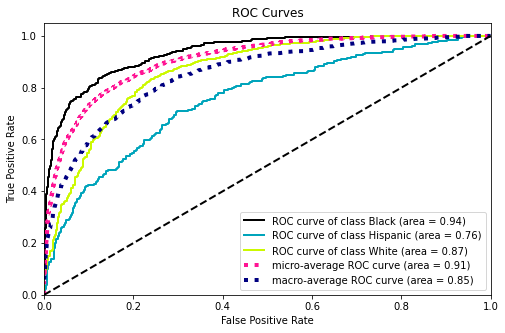

In [257]:
y_pred_proba = final_rf_pipe.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

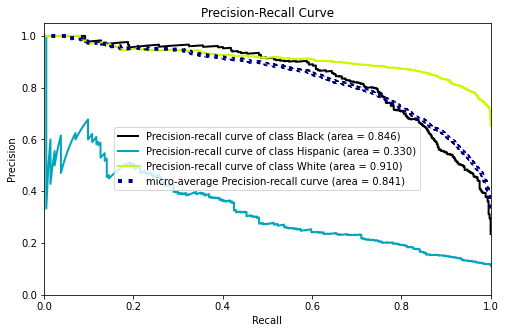

In [258]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [259]:
from xgboost import XGBClassifier

In [260]:
cat_ordinal = ["Gender"]

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier())]

In [261]:
xgb_pipe = Pipeline(steps=operations)

xgb_pipe.fit(X_train, y_train,)

[16:25:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, impor...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [262]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 357   10   80]
 [  21   42  151]
 [  24   23 1196]]
              precision    recall  f1-score   support

       Black       0.89      0.80      0.84       447
    Hispanic       0.56      0.20      0.29       214
       White       0.84      0.96      0.90      1243

    accuracy                           0.84      1904
   macro avg       0.76      0.65      0.68      1904
weighted avg       0.82      0.84      0.81      1904


Train_Set
[[ 851    0    0]
 [   0  465    0]
 [   0    0 2549]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       851
    Hispanic       1.00      1.00      1.00       465
       White       1.00      1.00      1.00      2549

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



In [263]:
# balance the data
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50542696, 2.77060932, 1.51390521, ..., 1.51390521, 0.50542696,
       0.50542696])

In [264]:
# Balanced vanilla model
cat_ordinal = ["Gender"]

enc_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((enc_ordinal, cat_ordinal),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier())]

xgb_pipe = Pipeline(steps=operations)
xgb_pipe.fit(X_train,y_train, XGB_model__sample_weight = classes_weights )

[16:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, impor...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [265]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[ 364   21   62]
 [  25   56  133]
 [  31   52 1160]]
              precision    recall  f1-score   support

       Black       0.87      0.81      0.84       447
    Hispanic       0.43      0.26      0.33       214
       White       0.86      0.93      0.89      1243

    accuracy                           0.83      1904
   macro avg       0.72      0.67      0.69      1904
weighted avg       0.81      0.83      0.82      1904


Train_Set
[[ 851    0    0]
 [   0  465    0]
 [   0    0 2549]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       851
    Hispanic       1.00      1.00      1.00       465
       White       1.00      1.00      1.00      2549

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865



### Cross Validation

In [266]:
operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier(eval_metric='mlogloss'))]

xgb_cv_model = Pipeline(steps=operations)

scores = cross_validate(xgb_cv_model, X_train, y_train,
                        scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'],
                        cv = 10, return_train_score=True,
                       fit_params={"XGB_model__sample_weight":classes_weights})

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.842430
train_accuracy           1.000000
test_precision_macro     0.756449
train_precision_macro    1.000000
test_recall_macro        0.695432
train_recall_macro       1.000000
test_f1_macro            0.711661
train_f1_macro           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [267]:
param_grid = {
              "XGB_model__n_estimators":[20,40,60],
              'XGB_model__max_depth':[3,5,7], 
              "XGB_model__learning_rate": [0.05, 0.1, 0.2],
              "XGB_model__subsample":[0.5, 0.8], 
              "XGB_model__colsample_bytree":[0.5, 0.7, 0.9]
             }

In [268]:
operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier())]

xgb_grid_model = Pipeline(steps=operations)

xgb_grid = GridSearchCV(xgb_grid_model, param_grid , scoring = "recall_macro", 
                        verbose=2, n_jobs = -1, 
                        return_train_score=True)

xgb_grid.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[16:28:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=Pipeline(steps=[('Encoders',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender'])])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=...
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.7, 0.9],
                         'XGB_model__learning_rate': [0.05, 0.1, 0.2],
                         'XGB_model__max_depth': [3, 5, 7],
                         'XGB_model__n_estimators': [20, 40, 60],
                         'XGB_model__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='recall_macro', verbose=2)

In [269]:
xgb_grid.best_params_

{'XGB_model__colsample_bytree': 0.5,
 'XGB_model__learning_rate': 0.2,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 60,
 'XGB_model__subsample': 0.8}

In [270]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[374  36  37]
 [ 27 117  70]
 [ 52 211 980]]
              precision    recall  f1-score   support

       Black       0.83      0.84      0.83       447
    Hispanic       0.32      0.55      0.40       214
       White       0.90      0.79      0.84      1243

    accuracy                           0.77      1904
   macro avg       0.68      0.72      0.69      1904
weighted avg       0.82      0.77      0.79      1904


Train_Set
[[ 803   24   24]
 [  18  395   52]
 [  86  286 2177]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.91       851
    Hispanic       0.56      0.85      0.68       465
       White       0.97      0.85      0.91      2549

    accuracy                           0.87      3865
   macro avg       0.80      0.88      0.83      3865
weighted avg       0.90      0.87      0.88      3865



In [271]:
operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier(n_estimators= 60, 
                                          colsample_bytree = 0.5, 
                                          subsample= 0.8, 
                                          learning_rate = 0.2,
                                          max_depth= 3,
                                          eval_metric="logloss"))]

xgb_cv_model = Pipeline(steps=operations)

scores = cross_validate(xgb_cv_model, X_train, y_train,
                        scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'],
                        cv = 10, return_train_score=True,
                       fit_params={"XGB_model__sample_weight":classes_weights})

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.790421
train_accuracy           0.879115
test_precision_macro     0.699231
train_precision_macro    0.812700
test_recall_macro        0.740616
train_recall_macro       0.891924
test_f1_macro            0.712775
train_f1_macro           0.840241
dtype: float64

In [272]:
# Final XGBoost model
operations = [("Encoders", column_trans), 
              ("XGB_model", XGBClassifier( n_estimators= 60, 
                                          colsample_bytree = 0.5, 
                                          subsample= 0.8, 
                                          learning_rate = 0.2,
                                          max_depth= 3,
                                          eval_metric="logloss"))]

final_xgb_pipe = Pipeline(steps=operations)
final_xgb_pipe.fit(X_train,y_train, XGB_model__sample_weight = classes_weights )

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, enable_categorical=False,
                               eval_metric='logloss'...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.2, max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=60,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=0.8,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [273]:
eval_metric(final_xgb_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[374  36  37]
 [ 27 117  70]
 [ 52 211 980]]
              precision    recall  f1-score   support

       Black       0.83      0.84      0.83       447
    Hispanic       0.32      0.55      0.40       214
       White       0.90      0.79      0.84      1243

    accuracy                           0.77      1904
   macro avg       0.68      0.72      0.69      1904
weighted avg       0.82      0.77      0.79      1904


Train_Set
[[ 803   24   24]
 [  18  395   52]
 [  86  286 2177]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.91       851
    Hispanic       0.56      0.85      0.68       465
       White       0.97      0.85      0.91      2549

    accuracy                           0.87      3865
   macro avg       0.80      0.88      0.83      3865
weighted avg       0.90      0.87      0.88      3865



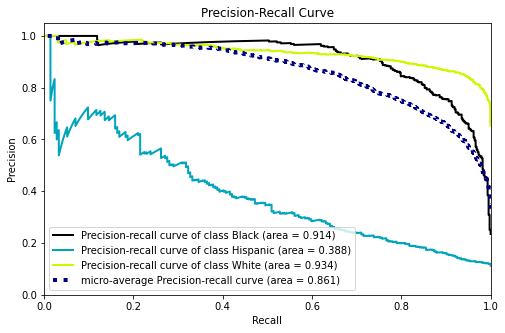

In [274]:
y_pred_proba = final_xgb_pipe.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show()

## Comparing Models

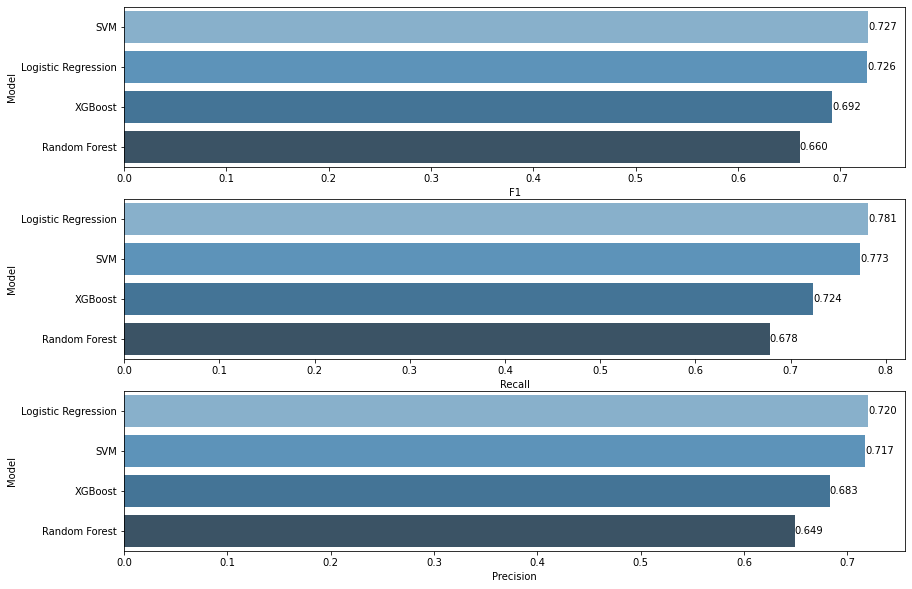

In [275]:
log_f1 = f1_score(y_test, final_log_pipe.predict(X_test), average='macro')
svc_f1 = f1_score(y_test, final_svc_pipe.predict(X_test), average='macro')
rf_f1 = f1_score(y_test, final_rf_pipe.predict(X_test), average='macro')
xgb_f1 = f1_score(y_test, final_xgb_pipe.predict(X_test), average='macro')

log_pre = precision_score(y_test, final_log_pipe.predict(X_test), average='macro')
svc_pre = precision_score(y_test, final_svc_pipe.predict(X_test), average='macro')
rf_pre = precision_score(y_test, final_rf_pipe.predict(X_test), average='macro')
xgb_pre = precision_score(y_test, final_xgb_pipe.predict(X_test), average='macro')

log_rec = recall_score(y_test, final_log_pipe.predict(X_test), average='macro')
svc_rec = recall_score(y_test, final_svc_pipe.predict(X_test), average='macro')
rf_rec = recall_score(y_test, final_rf_pipe.predict(X_test), average='macro')
xgb_rec = recall_score(y_test, final_xgb_pipe.predict(X_test), average='macro')

compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1, svc_f1, rf_f1, xgb_f1],
                        "Precision" : [log_pre, svc_pre, rf_pre, xgb_pre],
                        "Recall": [log_rec, svc_rec, rf_rec, xgb_rec],
                        })

plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

In [541]:
# Logistic Regression Model get the best scores

In [276]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_log_pipe.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.6444614898056953

In [277]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.6251107537820366

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [279]:
#!pip install imblearn

In [280]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [281]:
cat_onehot = ["Gender"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       remainder=MinMaxScaler())

In [282]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [284]:
operations = [("Encoders",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(penalty="l1", C=0.8, 
                                             class_weight="balanced",
                                             solver="saga"))] 

In [285]:
smote_pipeline = imbpipeline(steps=operations)

In [286]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender'])])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log',
                 LogisticRegression(C=0.8, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [287]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[391  38  18]
 [ 23 149  42]
 [ 28 252 963]]
              precision    recall  f1-score   support

       Black       0.88      0.87      0.88       447
    Hispanic       0.34      0.70      0.46       214
       White       0.94      0.77      0.85      1243

    accuracy                           0.79      1904
   macro avg       0.72      0.78      0.73      1904
weighted avg       0.86      0.79      0.81      1904


Train_Set
[[ 765   59   27]
 [  48  317  100]
 [  69  457 2023]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.88       851
    Hispanic       0.38      0.68      0.49       465
       White       0.94      0.79      0.86      2549

    accuracy                           0.80      3865
   macro avg       0.73      0.79      0.74      3865
weighted avg       0.86      0.80      0.82      3865



In [288]:
operations = [("Encoders",column_trans), 
              ("log", LogisticRegression(penalty="l1", C=0.8, 
                                             class_weight="balanced",
                                             solver="saga"))] 

model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, 
                        scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'], 
                        cv = 10, return_train_score=True,
                       error_score='raise')
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.793535
train_accuracy           0.806238
test_precision_macro     0.719300
train_precision_macro    0.735253
test_recall_macro        0.777794
train_recall_macro       0.798249
test_f1_macro            0.731659
train_f1_macro           0.749089
dtype: float64

In [289]:
from sklearn.metrics import matthews_corrcoef

y_pred = smote_pipeline.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.6477813870991393

In [290]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.6297456921488556

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [291]:
#!pip install shap

In [292]:
import shap

In [294]:
operations = [("Encoders", column_trans), 
              ("XGB_model", LogisticRegression( penalty="l1", C=0.8, 
                                             class_weight="balanced",
                                             solver="saga"))]

final_xgb_pipe = Pipeline(steps=operations)
final_xgb_pipe.fit(X_train,y_train )

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender'])])),
                ('XGB_model',
                 LogisticRegression(C=0.8, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [295]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), ["Gender"]), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression( penalty="l1", C=0.8, 
                                             class_weight="balanced",
                                             solver="saga")
model_shap.fit(X_train_trans, y_train)

LogisticRegression(C=0.8, class_weight='balanced', penalty='l1', solver='saga')

In [296]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[391  40  16]
 [ 22 150  42]
 [ 30 258 955]]
              precision    recall  f1-score   support

       Black       0.88      0.87      0.88       447
    Hispanic       0.33      0.70      0.45       214
       White       0.94      0.77      0.85      1243

    accuracy                           0.79      1904
   macro avg       0.72      0.78      0.73      1904
weighted avg       0.86      0.79      0.81      1904


Train_Set
[[ 757   68   26]
 [  42  329   94]
 [  69  451 2029]]
              precision    recall  f1-score   support

       Black       0.87      0.89      0.88       851
    Hispanic       0.39      0.71      0.50       465
       White       0.94      0.80      0.86      2549

    accuracy                           0.81      3865
   macro avg       0.73      0.80      0.75      3865
weighted avg       0.86      0.81      0.82      3865



In [297]:
model = LogisticRegression(penalty="l1", C=0.8, 
                             class_weight="balanced",
                             solver="saga")

scores = cross_validate(model, X_train_trans, y_train, 
                        scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'], 
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))

In [298]:
df_scores.mean()[2:]

test_accuracy            0.790686
train_accuracy           0.806404
test_precision_macro     0.717224
train_precision_macro    0.735000
test_recall_macro        0.777718
train_recall_macro       0.797657
test_f1_macro            0.729578
train_f1_macro           0.748889
dtype: float64

In [299]:
features = column_trans_shap.get_feature_names_out()
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'remainder__anklecircumference',
       'remainder__bicepscircumferenceflexed',
       'remainder__bicristalbreadth', 'remainder__bimalleolarbreadth',
       'remainder__bitragionchinarc',
       'remainder__bitragionsubmandibulararc',
       'remainder__bizygomaticbreadth', 'remainder__buttockcircumference',
       'remainder__buttockdepth', 'remainder__buttockkneelength',
       'remainder__calfcircumference', 'remainder__chestbreadth',
       'remainder__chestcircumference', 'remainder__chestdepth',
       'remainder__crotchlengthomphalion',
       'remainder__crotchlengthposterioromphalion',
       'remainder__earbreadth', 'remainder__earlength',
       'remainder__earprotrusion', 'remainder__elbowrestheight',
       'remainder__footbreadthhorizontal', 'remainder__footlength',
       'remainder__handbreadth', 'remainder__handcircumference',
       'remainder__handlength', 'remainder__headbreadth',
       'r

In [300]:
new_features = [i.replace("onehotencoder__", "").replace("remainder__","") for i in features]
new_features

['Gender_Female',
 'Gender_Male',
 'anklecircumference',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockkneelength',
 'calfcircumference',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'footbreadthhorizontal',
 'footlength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbreadth',
 'headcircumference',
 'headlength',
 'heelanklecircumference',
 'heelbreadth',
 'interpupillarybreadth',
 'interscyei',
 'lateralmalleolusheight',
 'lowerthighcircumference',
 'mentonsellionlength',
 'neckcircumference',
 'overheadfingertipreachsitting',
 'palmlength',
 'shouldercircumference',
 'shoulderlength',
 'sittingheight',
 'span',
 'stature',
 'thighclearance',
 'thumbtipreach',
 'tragiontopofhead',
 'v

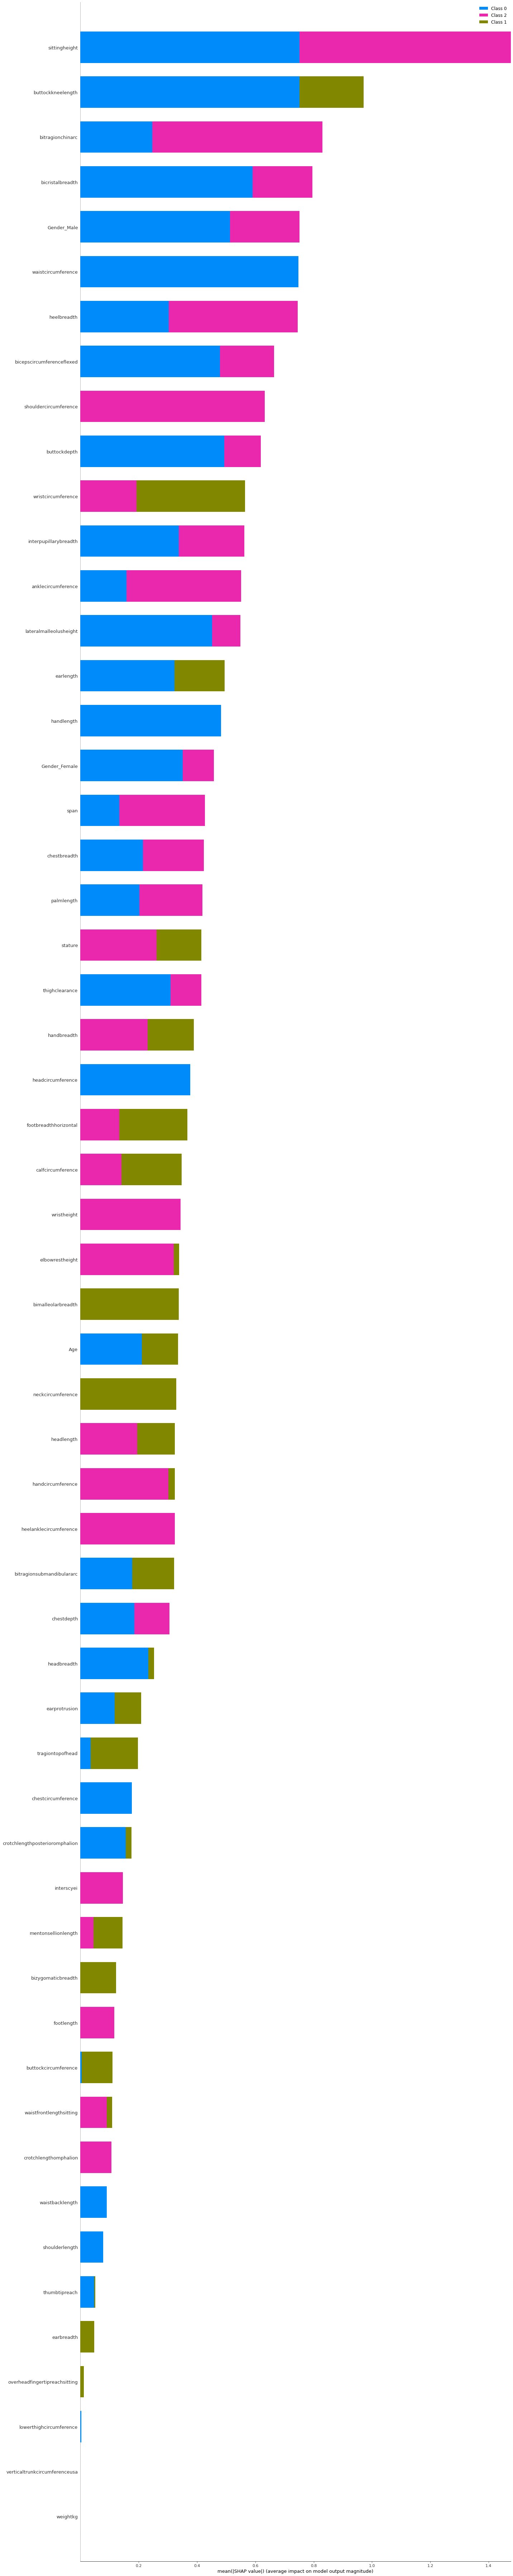

In [301]:
explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values,  max_display=300, feature_names = new_features, plot_size=(20,100) )

In [302]:
columns = ['earlength', 'buttockkneelength', 'wristcircumference', "stature", 'headbreadth','footbreadthhorizontal',
           'calfcircumference', 'elbowrestheight', "Age",  'neckcircumference', 'headlength',  'bitragionsubmandibulararc',
           'earprotrusion', 'sittingheight',  'bitragionchinarc', 'heelbreadth', 'interpupillarybreadth', "span", "Gender"]

In [303]:
df_snap = df[columns]
df_snap.head()

,earlength,buttockkneelength,wristcircumference,stature,headbreadth,footbreadthhorizontal,calfcircumference,elbowrestheight,Age,neckcircumference,headlength,bitragionsubmandibulararc,earprotrusion,sittingheight,bitragionchinarc,heelbreadth,interpupillarybreadth,span,Gender
0,65,587,152,1560,141,91,360,220,26,335,191,301,16,803,338,69,645,1647,Female
1,60,583,155,1665,138,91,350,208,21,302,180,270,23,835,294,60,595,1751,Female
2,65,583,162,1711,146,100,384,204,23,325,207,270,26,904,309,70,655,1779,Female
3,62,599,173,1660,153,97,372,244,22,357,206,294,22,875,340,68,655,1708,Female
4,65,607,152,1572,140,88,433,233,45,340,181,295,18,824,300,63,635,1702,Female


In [304]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_snap, y, test_size=0.3, random_state=101, stratify =y)

In [305]:
cat_new = df_snap.select_dtypes("object").columns
cat_new

Index(['Gender'], dtype='object')

In [306]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())
operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(penalty="l1", C=0.6, 
                                             class_weight="balanced",
                                             solver="saga"))]

snap_log_pipe = Pipeline(steps=operations)
snap_log_pipe.fit(X_train2,y_train2)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender'], dtype='object'))])),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=0.6, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [307]:
eval_metric(snap_log_pipe, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[328  46  15]
 [ 34 121  49]
 [ 55 237 846]]
              precision    recall  f1-score   support

       Black       0.79      0.84      0.81       389
    Hispanic       0.30      0.59      0.40       204
       White       0.93      0.74      0.83      1138

    accuracy                           0.75      1731
   macro avg       0.67      0.73      0.68      1731
weighted avg       0.82      0.75      0.77      1731


Train_Set
[[ 759   90   60]
 [  62  309  104]
 [ 171  547 1936]]
              precision    recall  f1-score   support

       Black       0.77      0.83      0.80       909
    Hispanic       0.33      0.65      0.43       475
       White       0.92      0.73      0.81      2654

    accuracy                           0.74      4038
   macro avg       0.67      0.74      0.68      4038
weighted avg       0.82      0.74      0.77      4038



In [308]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, 
                        scoring = ['accuracy', 'precision_macro','recall_macro', 'f1_macro'], 
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy            0.736746
train_accuracy           0.742199
test_precision_macro     0.665405
train_precision_macro    0.670018
test_recall_macro        0.731250
train_recall_macro       0.738189
test_f1_macro            0.675291
train_f1_macro           0.681592
dtype: float64

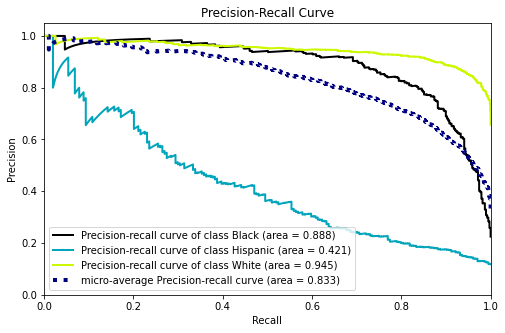

In [309]:
model = Pipeline(steps=operations)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [310]:
cat_onehot = ['Gender']
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       remainder='passthrough') 

operations = [("Encoders", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(penalty="l1", C=0.6, 
                                             class_weight="balanced",
                                             solver="saga"))]

final_model = Pipeline(steps=operations)
final_model.fit(X_train,y_train)

Pipeline(steps=[('Encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender'])])),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=0.6, class_weight='balanced',
                                    penalty='l1', solver='saga'))])

In [311]:
import pickle
pickle.dump(final_model, open("final_model", 'wb'))

In [312]:
race_model = pickle.load(open("final_model", "rb"))

In [313]:
df.describe(include="all").loc["mean"]

anklecircumference                 225.201768
bicepscircumferenceflexed          341.663027
bicristalbreadth                   274.903449
bimalleolarbreadth                  72.335413
bitragionchinarc                   324.962212
bitragionsubmandibulararc           306.67776
bizygomaticbreadth                 139.529381
buttockcircumference              1022.059456
buttockdepth                       242.234356
buttockkneelength                  610.449991
calfcircumference                  386.316519
chestbreadth                       283.232623
chestcircumference                1024.206622
chestdepth                         252.322586
crotchlengthomphalion              622.693708
crotchlengthposterioromphalion     351.880222
earbreadth                           35.17542
earlength                           62.606171
earprotrusion                       22.227249
elbowrestheight                    240.553302
footbreadthhorizontal               98.915063
footlength                        

In [314]:
sample =pd.DataFrame(data=df.describe(include="all").loc["mean"].values,
            index=df.describe(include="all").loc["mean"].index).T
sample

,anklecircumference,bicepscircumferenceflexed,bicristalbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockkneelength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,footbreadthhorizontal,footlength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,interpupillarybreadth,interscyei,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,overheadfingertipreachsitting,palmlength,shouldercircumference,shoulderlength,sittingheight,span,stature,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistcircumference,waistfrontlengthsitting,weightkg,wristcircumference,wristheight,Gender,DODRace,Age
0,225.201768,341.663027,274.903449,72.335413,324.962212,306.67776,139.529381,1022.059456,242.234356,610.449991,386.316519,283.232623,1024.206622,252.322586,622.693708,351.880222,35.17542,62.606171,22.227249,240.553302,98.915063,263.512394,85.098111,204.215635,189.574796,152.043682,570.424337,196.640839,333.274918,70.834113,632.534928,412.773964,69.76183,406.943144,119.601664,376.127578,1390.525048,114.106604,1131.214422,145.202288,898.592477,1766.951118,1716.938984,176.696481,791.044548,129.580343,1632.470966,460.990293,916.817126,377.352054,80.098111,169.308372,831.334547,NaN,NaN,29.776391


In [315]:
sample["Gender"] = "Female"
sample.drop("DODRace", axis=1, inplace=True)

In [316]:
predictions = final_model.predict(sample)
predictions_proba = final_model.predict_proba(sample)

In [317]:
predictions

array(['Hispanic'], dtype=object)

In [318]:
predictions_proba

array([[0.33658132, 0.36418201, 0.29923667]])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___